# Exploratory Data Analysis For San Francisco Crime Classification
Yang Yang Qian

https://www.kaggle.com/c/sf-crime

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

import seaborn as sns
sns.set(style="ticks", color_codes=True)

%reload_ext autoreload
%autoreload 2
from src.features.build_features import DataFrameSelector, SFCCTransformer, print_summary

# Load Data

In [12]:
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

In [13]:
# extract some more features using our custom transformer

sfcc = SFCCTransformer()

pipe = Pipeline([
    ("transformer", sfcc)
])

train_pd = pipe.transform(train_pd)
test_pd = pipe.transform(test_pd)

# Macro

In [14]:
print(train_pd.shape)
print(test_pd.shape)

(878049, 31)
(884262, 29)


In [15]:
train_pd.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  hour_delta  ...  year  is_weekend  is_holiday  \
0 -122.425892  37.774599      108263  ...  2015           0           0   
1 -122.425892  37.774599      108263  ...  2015           0           0   
2 -122.424363  37.800414      108263  ...  2015           0           0   
3 -122.426995  37.800873      108263  ...  2015           0           0   
4 -122.438738  37.771541      108263  ...  2015           0           0   

   hour_of_day_sin  hour_of_day_cos  day_of_week_sin  day_of_week_cos  \
0           -0.259            0.966            0.975           -0.223   
1           -0.259            0.966            0.975           -0.223   
2           -0.259            0.966            0.975           -0.223   
3           -0.259            0.966            0.975           -0.223   
4           -0.259            0.966            0.975           -0.223   

   month_of_year_sin  month_of_year_cos  is_latenight  
0              0.866               -0.5             1  
1              0.866               -0.5             1  
2              0.866               -0.5             1  
3              0.866               -0.5             1  
4              0.866               -0.5             1  

[5 rows x 31 columns]

In [17]:
test_pd.head()

Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  hour_delta  day_delta  week_delta  ...  year  \
0 -122.399588  37.735051      108311       4512         644  ...  2015   
1 -122.391523  37.732432      108311       4512         644  ...  2015   
2 -122.426002  37.792212      108311       4512         644  ...  2015   
3 -122.437394  37.721412      108311       4512         644  ...  2015   
4 -122.437394  37.721412      108311       4512         644  ...  2015   

   is_weekend  is_holiday  hour_of_day_sin  hour_of_day_cos  day_of_week_sin  \
0           1           0           -0.259            0.966           -0.782   
1           1           0           -0.259            0.966           -0.782   
2           1           0           -0.259            0.966           -0.782   
3           1           0           -0.259            0.966           -0.782   
4           1           0           -0.259            0.966           -0.782   

   day_of_week_cos  month_of_year_sin  month_of_year_cos  is_latenight  
0            0.623              0.866               -0.5             1  
1            0.623              0.866               -0.5             1  
2            0.623              0.866               -0.5             1  
3            0.623              0.866               -0.5             1  
4            0.623              0.866               -0.5             1  

[5 rows x 29 columns]

In [18]:
print_summary(train_pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 31 columns):
Dates                878049 non-null object
Category             878049 non-null object
Descript             878049 non-null object
DayOfWeek            878049 non-null object
PdDistrict           878049 non-null object
Resolution           878049 non-null object
Address              878049 non-null object
X                    878049 non-null float64
Y                    878049 non-null float64
hour_delta           878049 non-null int32
day_delta            878049 non-null int32
week_delta           878049 non-null int32
month_delta          878049 non-null int32
year_delta           878049 non-null int32
hour_of_day          878049 non-null int64
day_of_week          878049 non-null int64
day_of_month         878049 non-null int64
day_of_year          878049 non-null int64
week_of_year         878049 non-null int64
month_of_year        878049 non-null int64
quarter_of_year   

In [19]:
print_summary(test_pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 29 columns):
Id                   884262 non-null int64
Dates                884262 non-null object
DayOfWeek            884262 non-null object
PdDistrict           884262 non-null object
Address              884262 non-null object
X                    884262 non-null float64
Y                    884262 non-null float64
hour_delta           884262 non-null int32
day_delta            884262 non-null int32
week_delta           884262 non-null int32
month_delta          884262 non-null int32
year_delta           884262 non-null int32
hour_of_day          884262 non-null int64
day_of_week          884262 non-null int64
day_of_month         884262 non-null int64
day_of_year          884262 non-null int64
week_of_year         884262 non-null int64
month_of_year        884262 non-null int64
quarter_of_year      884262 non-null int64
year                 884262 non-null int64
is_weekend           

 # Univariate

## Category

* categorical variable with 39 levels
* is what we are trying to predict
* most of the crimes is theft, at around 20% of all crime

In [9]:
train_pd.Category.value_counts()[0:5]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
Name: Category, dtype: int64

In [10]:
train_pd.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [11]:
len(train_pd.Category.unique())

39

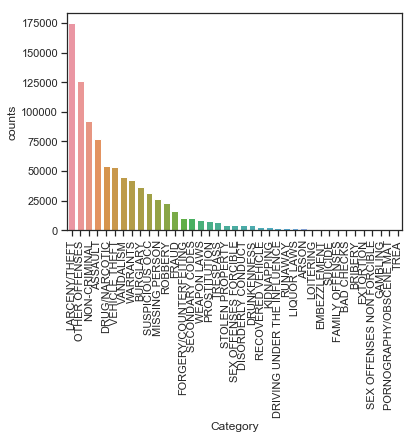

In [4]:
dat = train_pd.groupby(["Category"]).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)

g = sns.barplot(x="Category", y="counts", data=dat)
ax = g.set_xticklabels(g.get_xticklabels(), rotation = 90)
ax.set

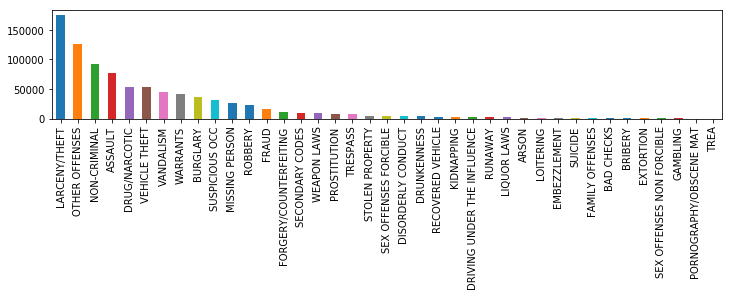

In [12]:
_ = train_pd.Category.value_counts().plot(kind = "bar", figsize = (12,2))

In [13]:
np.divide(train_pd.Category.value_counts(), train_pd.shape[0])

LARCENY/THEFT                  0.199192
OTHER OFFENSES                 0.143707
NON-CRIMINAL                   0.105124
ASSAULT                        0.087553
DRUG/NARCOTIC                  0.061467
VEHICLE THEFT                  0.061251
VANDALISM                      0.050937
WARRANTS                       0.048077
BURGLARY                       0.041860
SUSPICIOUS OCC                 0.035777
MISSING PERSON                 0.029599
ROBBERY                        0.026194
FRAUD                          0.018996
FORGERY/COUNTERFEITING         0.012082
SECONDARY CODES                0.011372
WEAPON LAWS                    0.009743
PROSTITUTION                   0.008523
TRESPASS                       0.008343
STOLEN PROPERTY                0.005171
SEX OFFENSES FORCIBLE          0.004997
DISORDERLY CONDUCT             0.004920
DRUNKENNESS                    0.004874
RECOVERED VEHICLE              0.003574
KIDNAPPING                     0.002666
DRIVING UNDER THE INFLUENCE    0.002583


## PdDistrict

* categorical variable with 10 levels
* should be roughly correlated with X and Y ?
* southern district appears to have the highest number of reported crimes. Maybe larger district? more cops? or just more crime?

In [14]:
train_pd.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [15]:
len(train_pd.PdDistrict.unique())

10

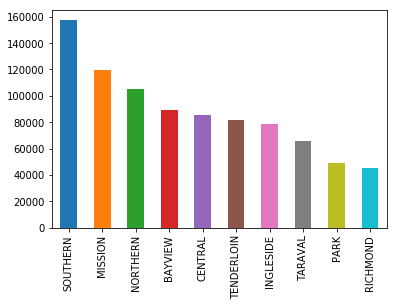

In [16]:
_ = train_pd.PdDistrict.value_counts().plot(kind = "bar")

## Address

* might be able to extract street from this
* probably correlated with X and Y

In [17]:
train_pd.Address.value_counts()[0:5]

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
Name: Address, dtype: int64

In [18]:
train_pd.Address.unique()

array(['OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST',
       '1500 Block of LOMBARD ST', ..., '300 Block of JOHN F KENNEDY DR',
       'FOLSOM ST / ZENO PL', '1000 Block of 22ND AV'], dtype=object)

In [19]:
len(train_pd.Address.unique())

23228

## X

* longitude
* appears to have some outliers, maybe some mis-coded locations?

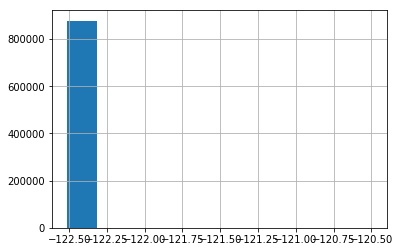

In [20]:
_ = train_pd.X.hist()

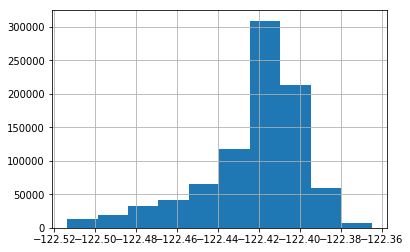

In [21]:
_ = train_pd.query("X <= -122.25").X.hist()

In [22]:
train_pd.query("X > -122.25").shape

(67, 30)

In [23]:
train_pd.query("X > -122.25").head()

Dates        Category  \
660485  2005-12-30 17:00:00   LARCENY/THEFT   
660711  2005-12-30 00:34:00         ASSAULT   
660712  2005-12-30 00:34:00         ASSAULT   
661106  2005-12-29 00:07:00    NON-CRIMINAL   
666430  2005-11-30 11:25:00  OTHER OFFENSES   

                                    Descript  DayOfWeek  PdDistrict  \
660485          GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711           INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712  AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106          AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                     TRAFFIC VIOLATION  Wednesday  TENDERLOIN   

               Resolution                          Address      X     Y  \
660485               NONE      5THSTNORTH ST / OFARRELL ST -120.5  90.0   
660711     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0   
660712     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0   
661106  PSYCHOPATHIC CASE          5THSTNORTH ST / EDDY ST -120.5  90.0   
666430      ARREST, CITED         5THSTNORTH ST / ELLIS ST -120.5  90.0   

        hour_delta        ...          quarter_of_year  year  is_weekend  \
660485       26152        ...                        4  2005           0   
660711       26136        ...                        4  2005           0   
660712       26136        ...                        4  2005           0   
661106       26112        ...                        4  2005           0   
666430       25427        ...                        4  2005           0   

        is_holiday  hour_of_day_sin  hour_of_day_cos  day_of_week_sin  \
660485           0           -0.966           -0.259           -0.434   
660711           0            0.000            1.000           -0.434   
660712           0            0.000            1.000           -0.434   
661106           0            0.000            1.000            0.434   
666430           0            0.259           -0.966            0.975   

        day_of_week_cos  month_of_year_sin  month_of_year_cos  
660485           -0.901             -0.500              0.866  
660711           -0.901             -0.500              0.866  
660712           -0.901             -0.500              0.866  
661106           -0.901             -0.500              0.866  
666430           -0.223             -0.866              0.500  

[5 rows x 30 columns]

## Y

* lattitude
* appears to have some outliers, maybe some mis-coded locations?

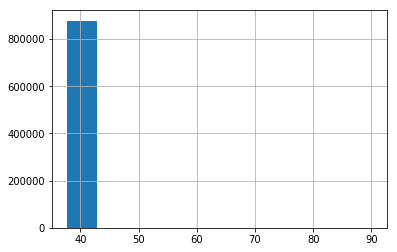

In [24]:
_ = train_pd.Y.hist()

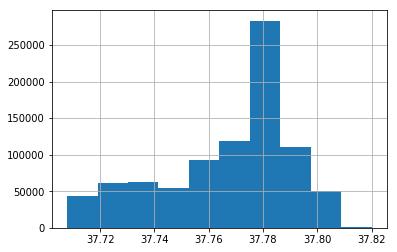

In [25]:
_ = train_pd.query("Y <= 50").Y.hist()

In [26]:
train_pd.query("Y > 50").shape

(67, 30)

In [27]:
train_pd.query("Y > 50").head()

Dates        Category  \
660485  2005-12-30 17:00:00   LARCENY/THEFT   
660711  2005-12-30 00:34:00         ASSAULT   
660712  2005-12-30 00:34:00         ASSAULT   
661106  2005-12-29 00:07:00    NON-CRIMINAL   
666430  2005-11-30 11:25:00  OTHER OFFENSES   

                                    Descript  DayOfWeek  PdDistrict  \
660485          GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711           INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712  AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106          AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                     TRAFFIC VIOLATION  Wednesday  TENDERLOIN   

               Resolution                          Address      X     Y  \
660485               NONE      5THSTNORTH ST / OFARRELL ST -120.5  90.0   
660711     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0   
660712     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0   
661106  PSYCHOPATHIC CASE          5THSTNORTH ST / EDDY ST -120.5  90.0   
666430      ARREST, CITED         5THSTNORTH ST / ELLIS ST -120.5  90.0   

        hour_delta        ...          quarter_of_year  year  is_weekend  \
660485       26152        ...                        4  2005           0   
660711       26136        ...                        4  2005           0   
660712       26136        ...                        4  2005           0   
661106       26112        ...                        4  2005           0   
666430       25427        ...                        4  2005           0   

        is_holiday  hour_of_day_sin  hour_of_day_cos  day_of_week_sin  \
660485           0           -0.966           -0.259           -0.434   
660711           0            0.000            1.000           -0.434   
660712           0            0.000            1.000           -0.434   
661106           0            0.000            1.000            0.434   
666430           0            0.259           -0.966            0.975   

        day_of_week_cos  month_of_year_sin  month_of_year_cos  
660485           -0.901             -0.500              0.866  
660711           -0.901             -0.500              0.866  
660712           -0.901             -0.500              0.866  
661106           -0.901             -0.500              0.866  
666430           -0.223             -0.866              0.500  

[5 rows x 30 columns]

## DayOfWeek

* categorical variable with 7 levels
* looks like number of reported crimes is highest on Friday for some reason
* highest vs lowest is about 12% decrease 

In [28]:
train_pd.DayOfWeek.unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [29]:
train_pd.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

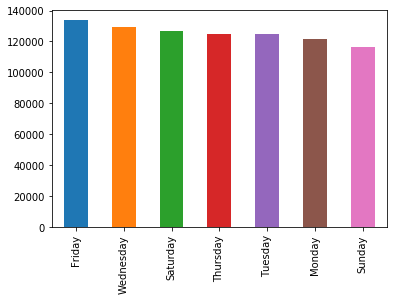

In [30]:
_ = train_pd.DayOfWeek.value_counts().plot(kind = "bar")

## Dates

* a date and time value, which maybe we can split into components, e.g.
    + date
    + hour of day
    + am vs pm
    + weekends vs weekdays
* maybe can also transform into other date-and-time-related features, e.g.
    + police shift
    + day and police shift

In [31]:
train_pd.Dates.unique()

array(['2015-05-13 23:53:00', '2015-05-13 23:33:00',
       '2015-05-13 23:30:00', ..., '2003-01-06 00:20:00',
       '2003-01-06 00:15:00', '2003-01-06 00:01:00'], dtype=object)

## Descript

* not very useful for prediction classification task
* not available in Test data
* a categorical variable with lots of levels

In [32]:
train_pd.Descript.value_counts()[0:5]

GRAND THEFT FROM LOCKED AUTO             60022
LOST PROPERTY                            31729
BATTERY                                  27441
STOLEN AUTOMOBILE                        26897
DRIVERS LICENSE, SUSPENDED OR REVOKED    26839
Name: Descript, dtype: int64

In [33]:
train_pd.Descript.unique()[0:10]

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE'], dtype=object)

## Resolution

* not available in Test data
* not very useful for prediction classification task

In [34]:
train_pd.Resolution.unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

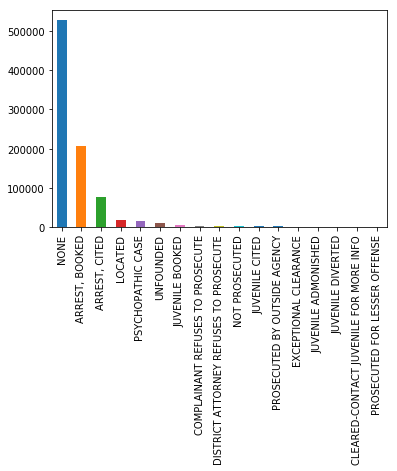

In [35]:
_ = train_pd.Resolution.value_counts().plot(kind = "bar")

# Multivariate

## X and Y

* the outliers in X and Y might be miss-coded
* if we eliminate them, the shape of the city becomes more apparent

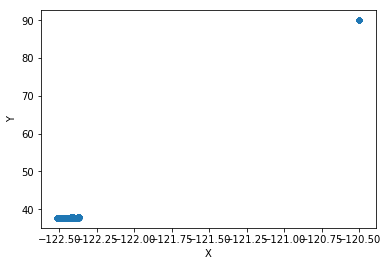

In [36]:
_ = train_pd[["X", "Y"]].plot(kind = "scatter", x = "X", y = "Y")

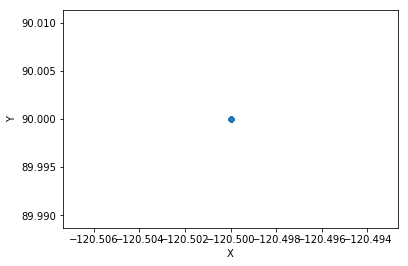

In [37]:
_ = train_pd[["X", "Y"]].query("Y >= 50").plot(kind = "scatter", x = "X", y = "Y")

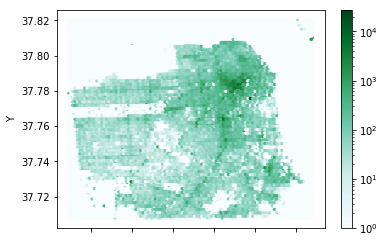

In [38]:
_ = train_pd[["X", "Y"]].query("Y < 50").plot(kind = "hexbin", x = "X", y = "Y", bins = "log")

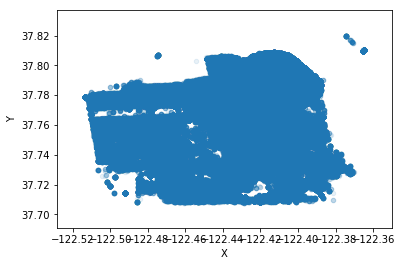

In [39]:
_ = train_pd[["X", "Y"]].query("Y < 50").plot(kind = "scatter", x = "X", y = "Y", alpha = 0.1)

There are definitely crime "hotspots"

* some crimes are so common that we need to use hexbin to better see what is going on

also, there might be some stringly structure. Perhaps some streets are associated with certain types of crimes.

WARRANTS


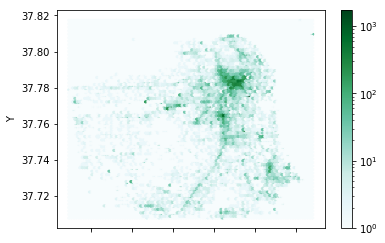

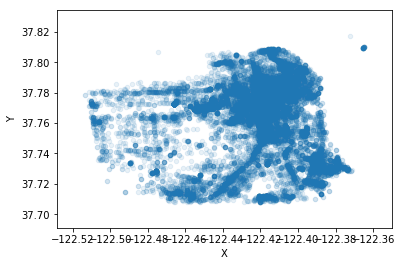

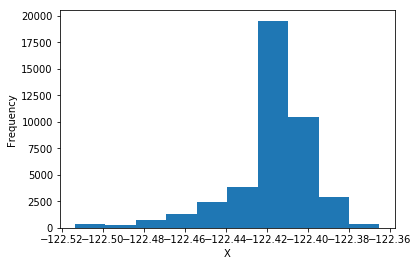

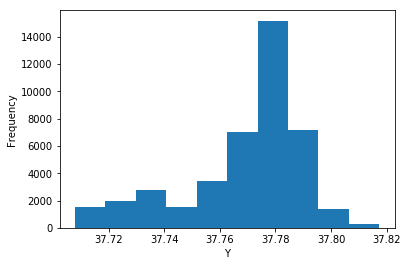

OTHER OFFENSES


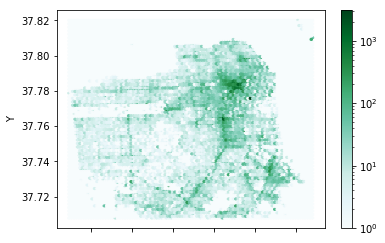

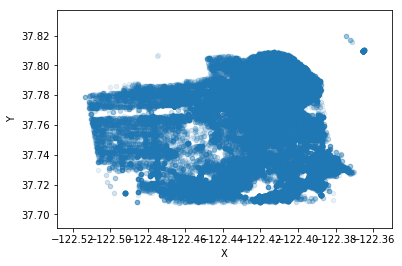

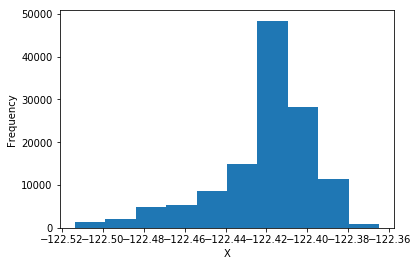

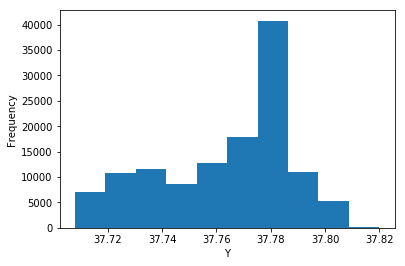

LARCENY/THEFT


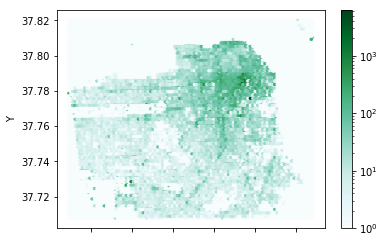

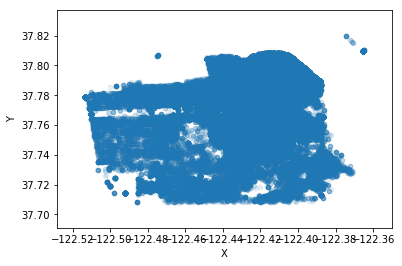

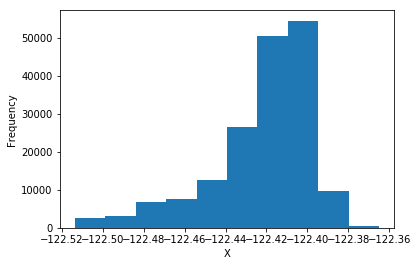

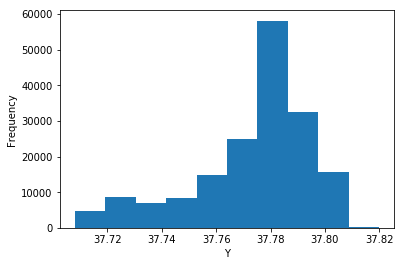

VEHICLE THEFT


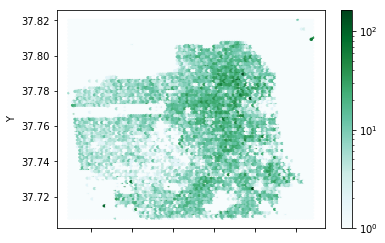

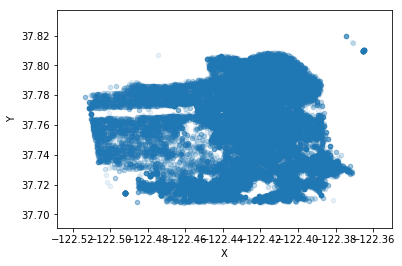

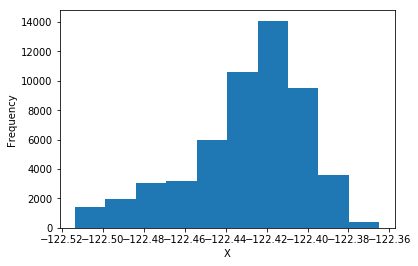

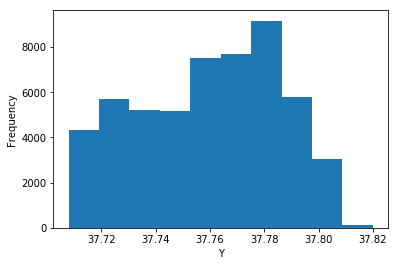

VANDALISM


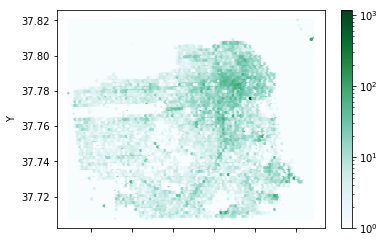

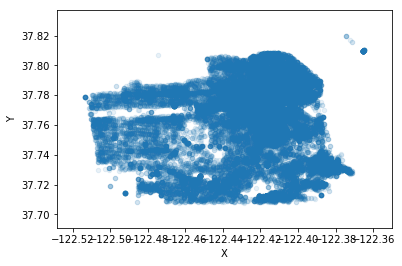

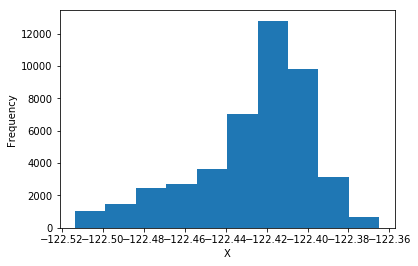

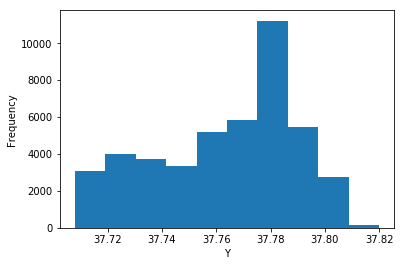

NON-CRIMINAL


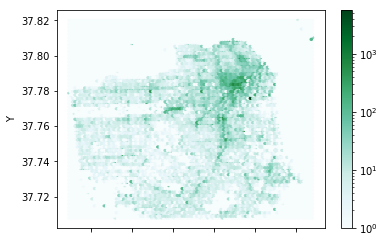

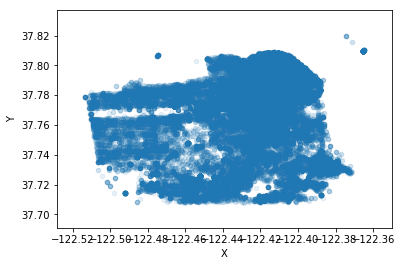

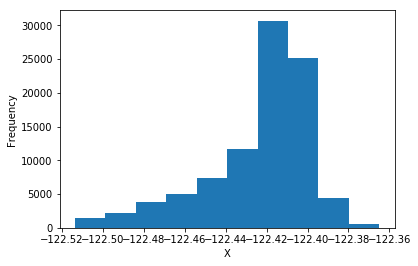

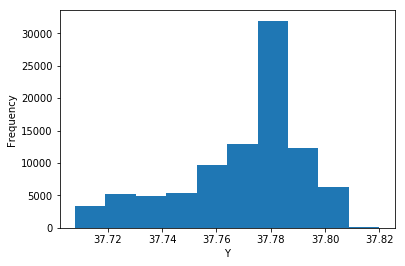

ROBBERY


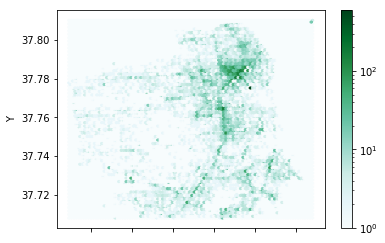

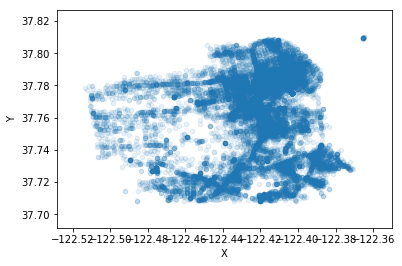

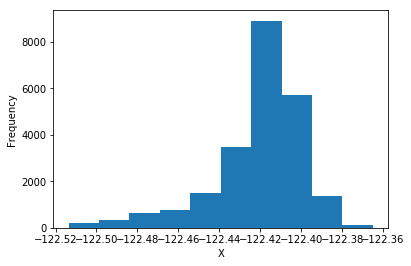

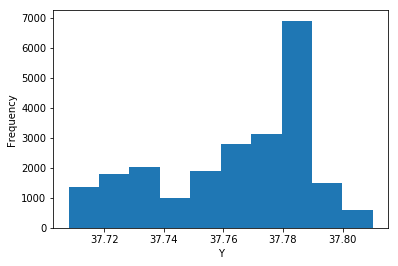

ASSAULT


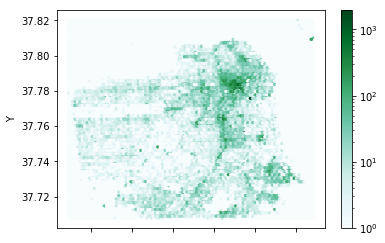

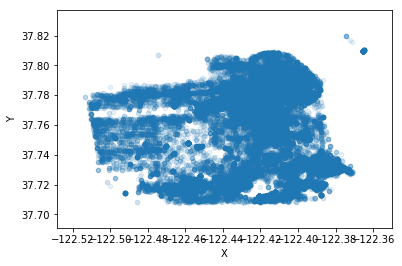

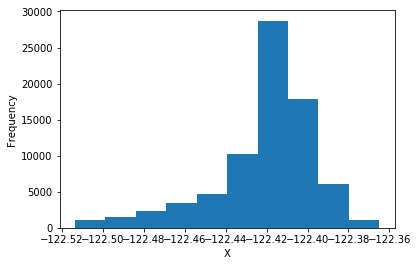

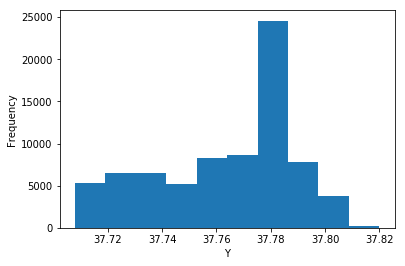

WEAPON LAWS


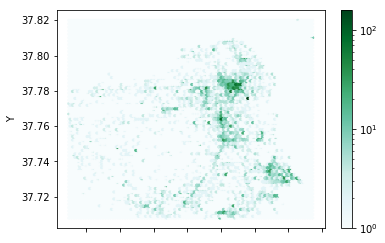

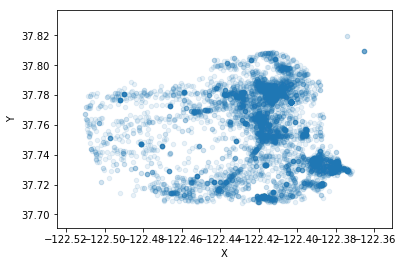

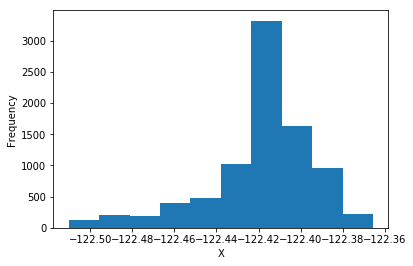

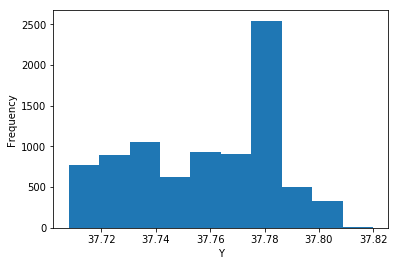

BURGLARY


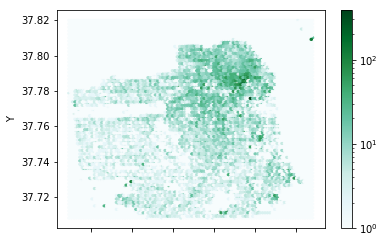

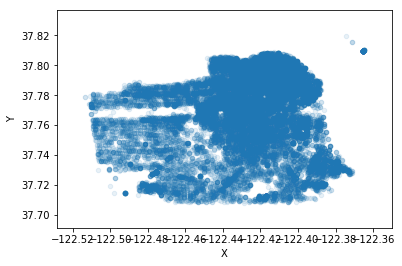

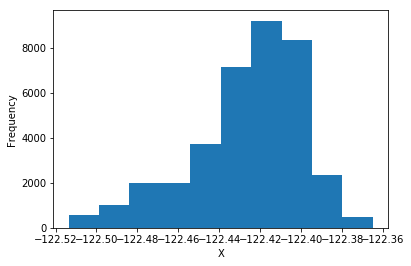

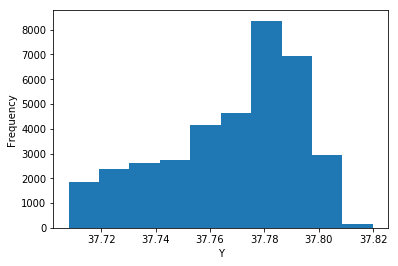

SUSPICIOUS OCC


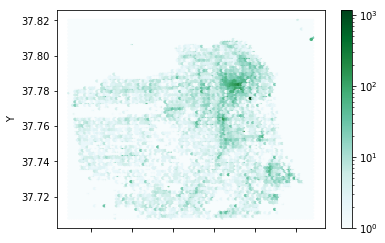

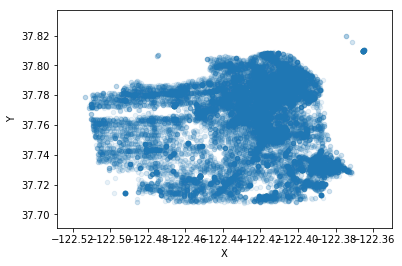

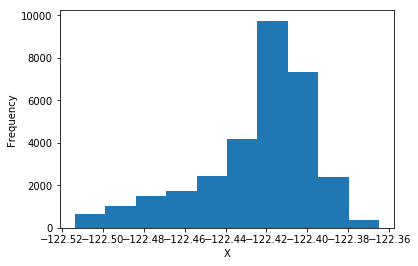

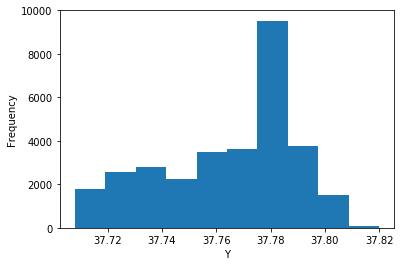

DRUNKENNESS


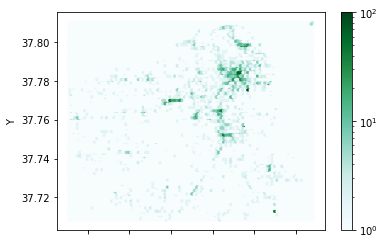

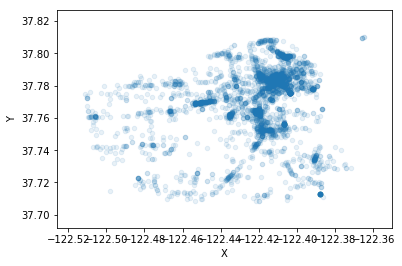

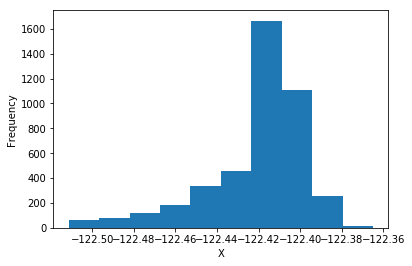

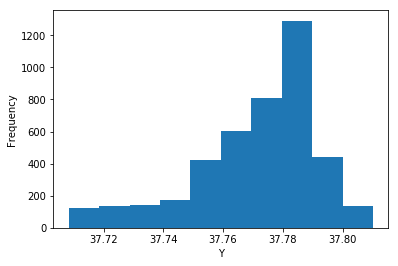

FORGERY/COUNTERFEITING


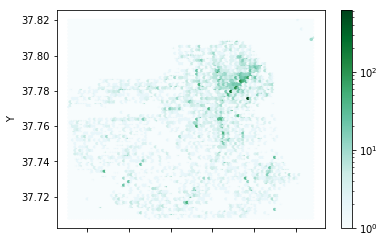

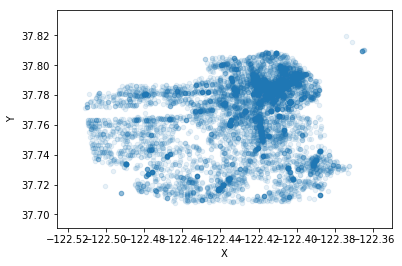

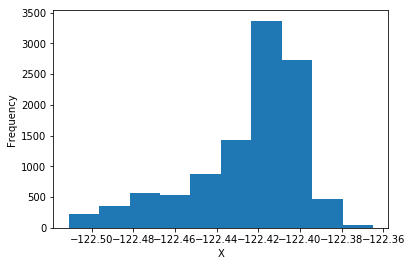

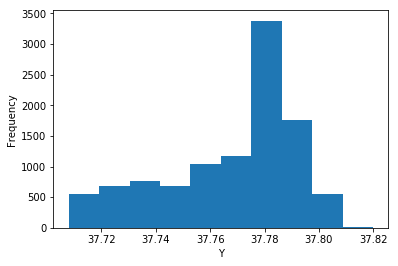

DRUG/NARCOTIC


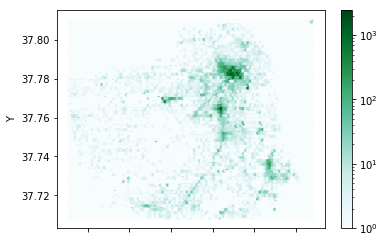

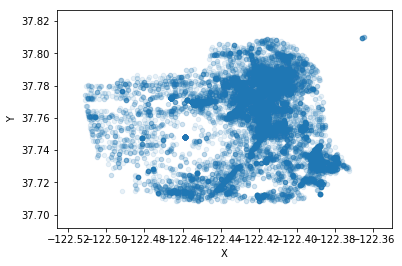

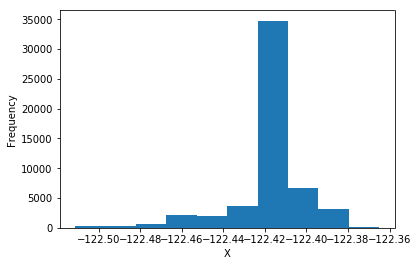

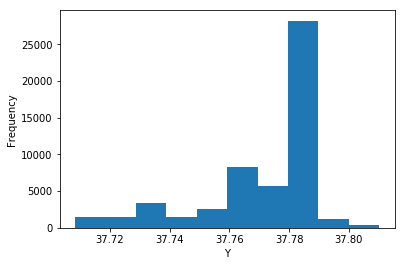

STOLEN PROPERTY


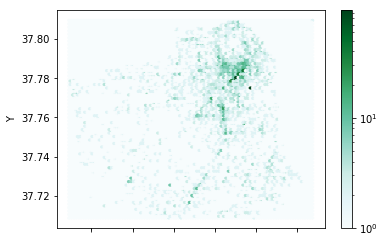

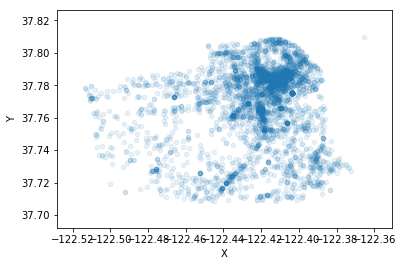

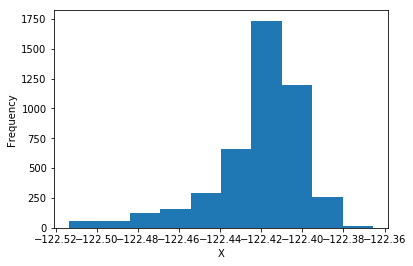

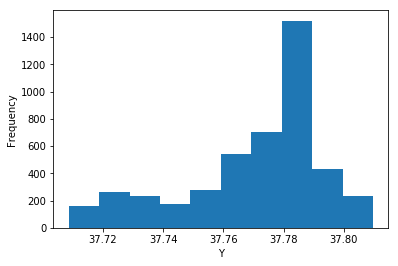

SECONDARY CODES


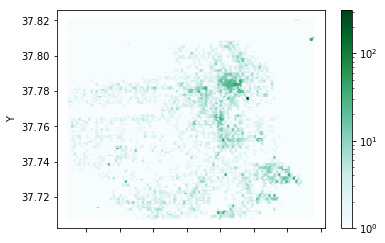

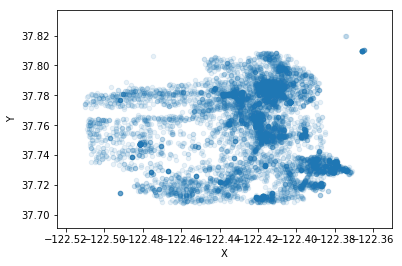

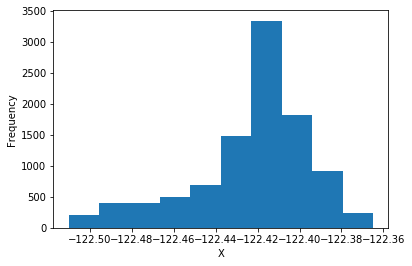

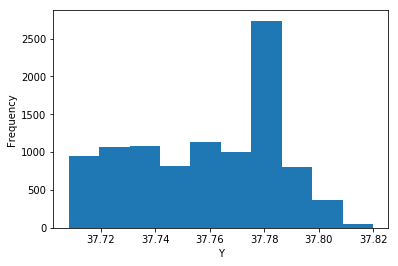

TRESPASS


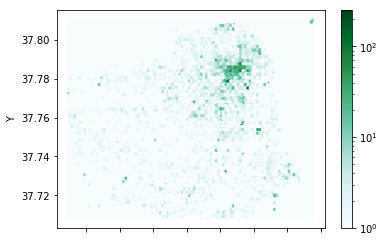

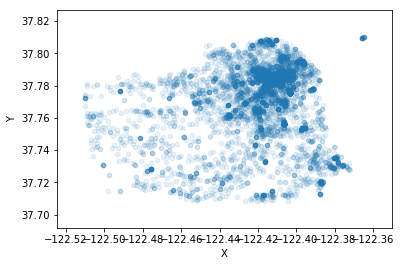

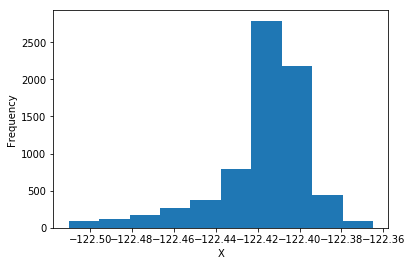

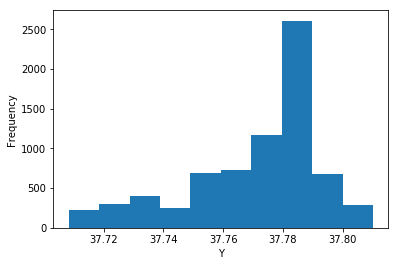

MISSING PERSON


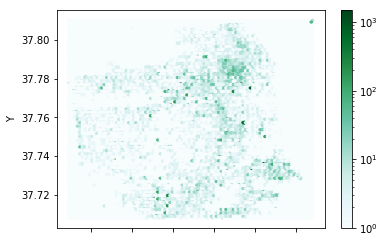

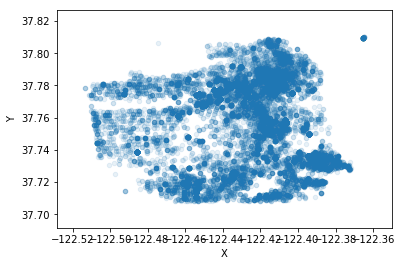

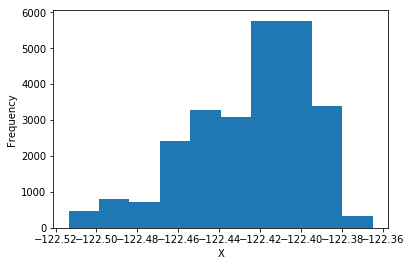

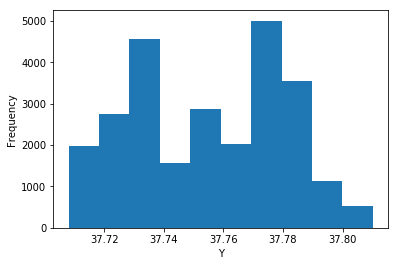

FRAUD


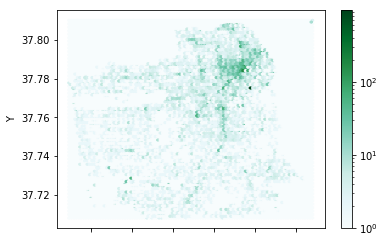

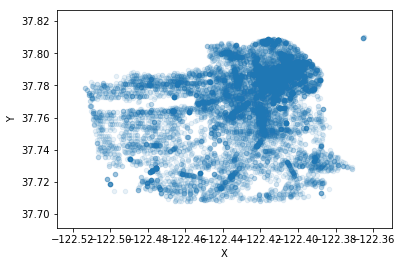

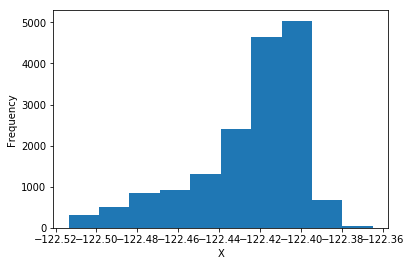

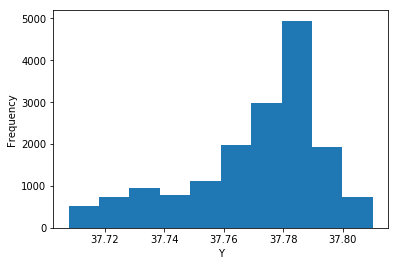

KIDNAPPING


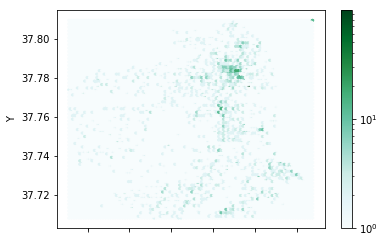

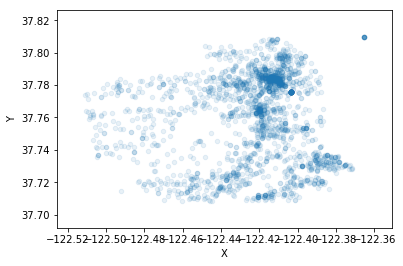

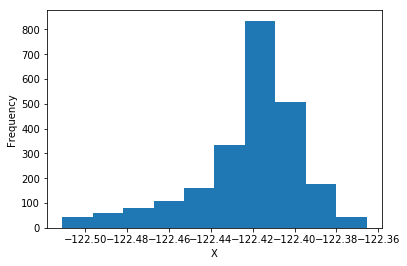

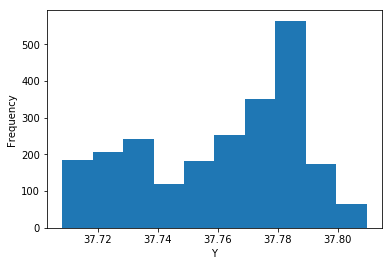

RUNAWAY


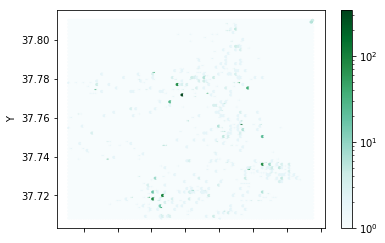

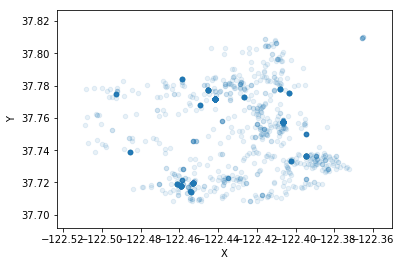

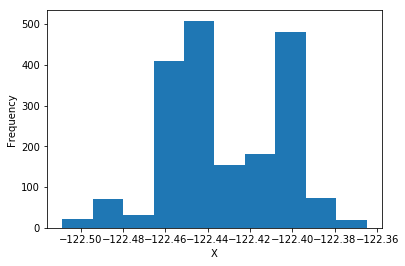

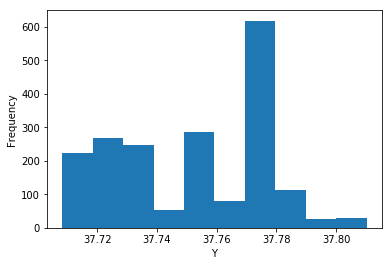

DRIVING UNDER THE INFLUENCE


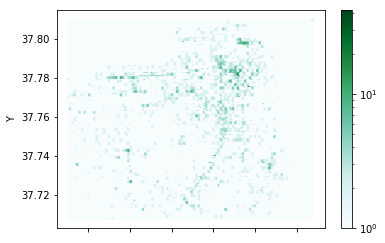

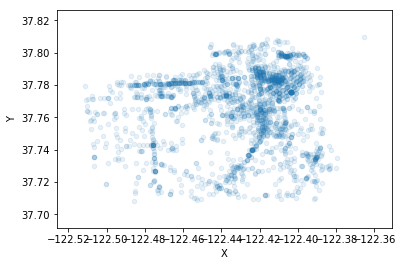

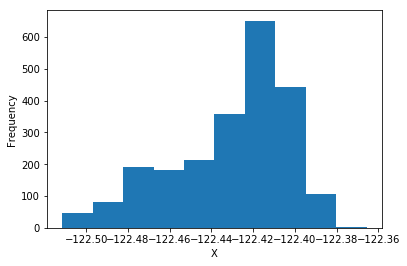

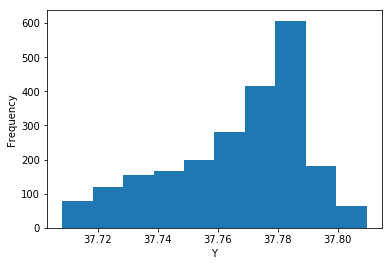

SEX OFFENSES FORCIBLE


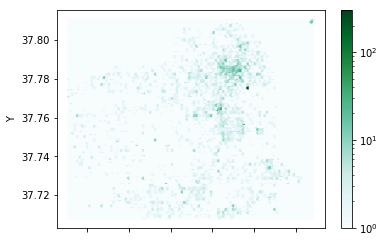

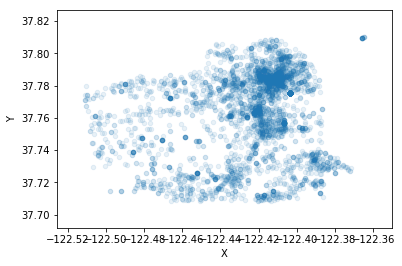

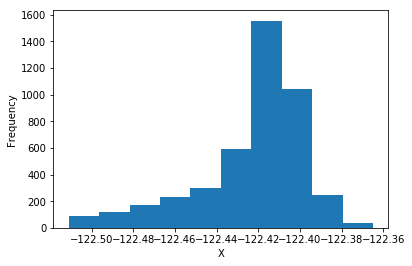

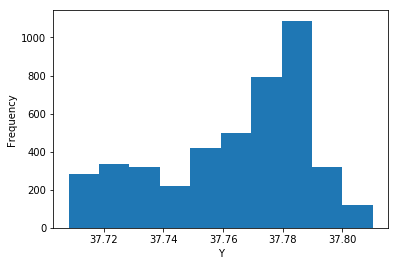

PROSTITUTION


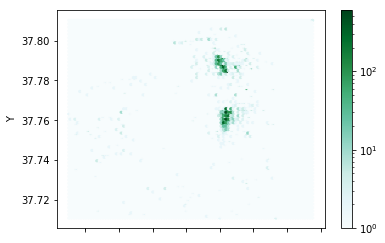

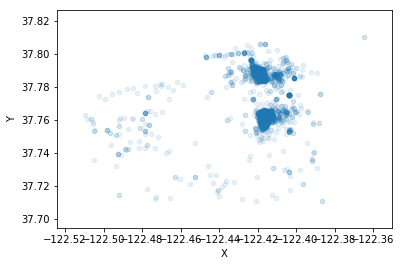

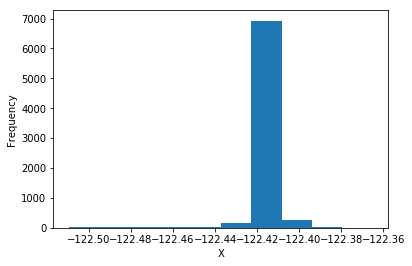

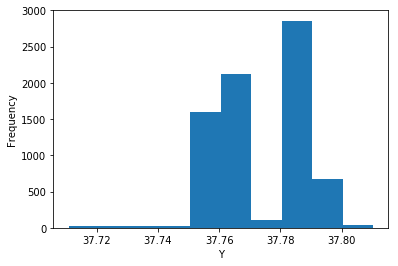

DISORDERLY CONDUCT


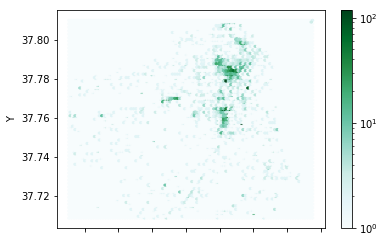

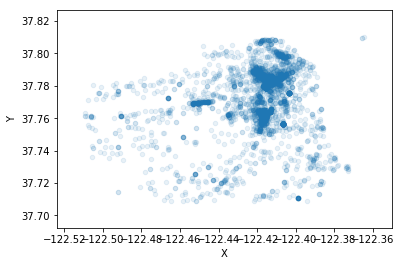

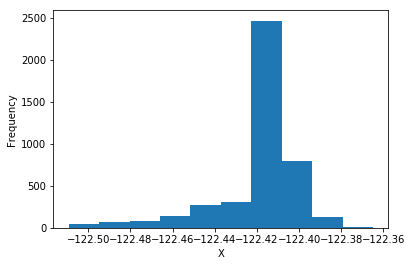

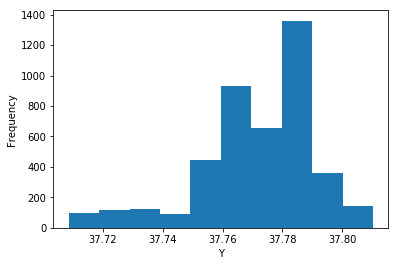

ARSON


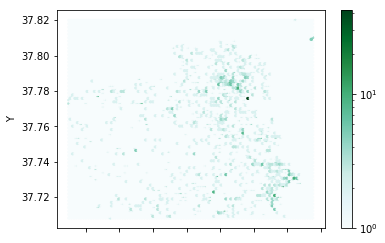

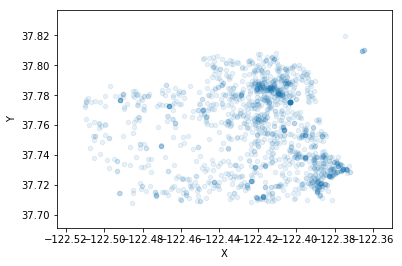

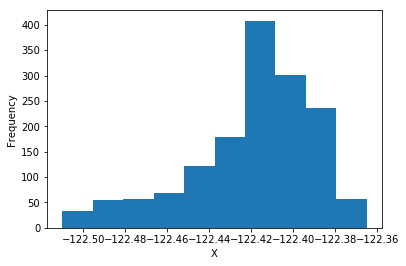

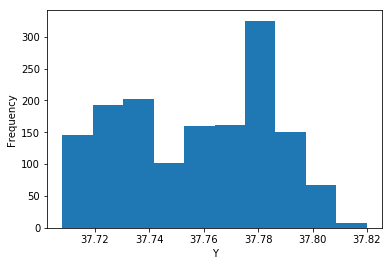

FAMILY OFFENSES


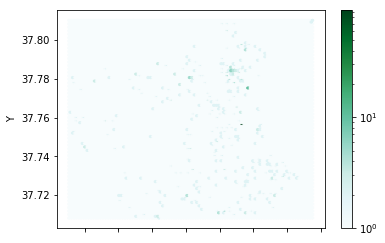

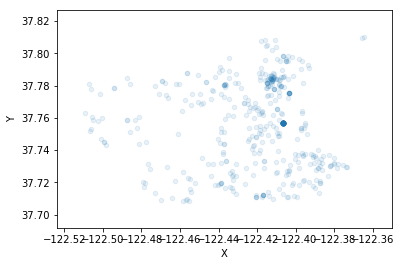

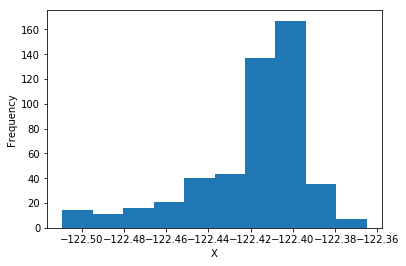

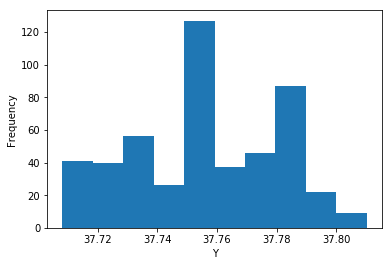

LIQUOR LAWS


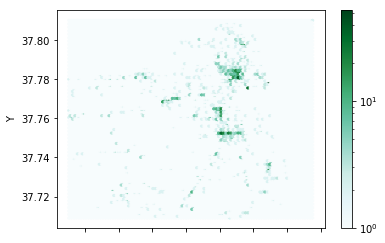

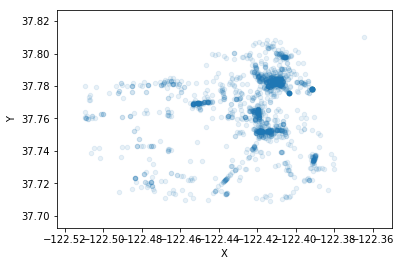

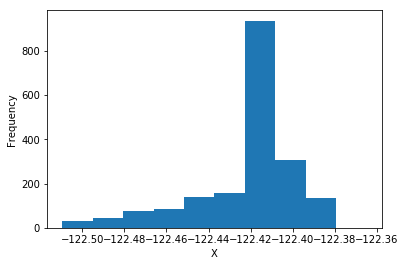

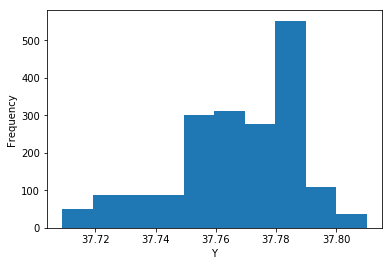

BRIBERY


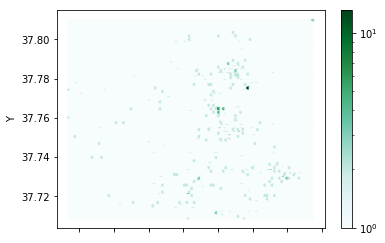

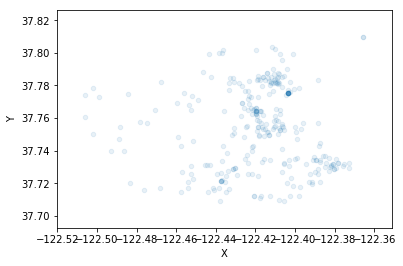

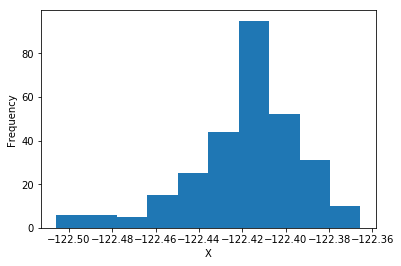

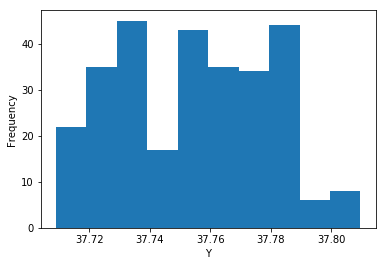

EMBEZZLEMENT


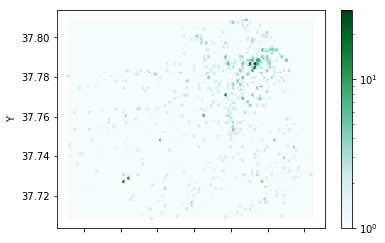

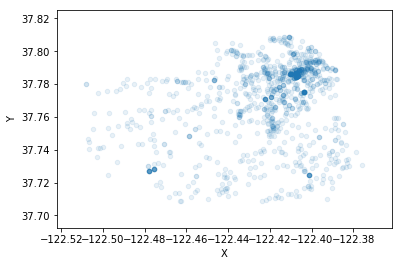

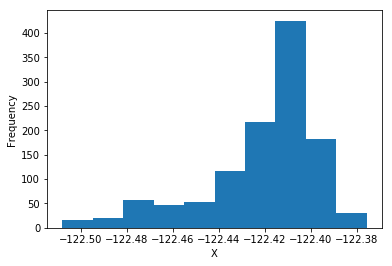

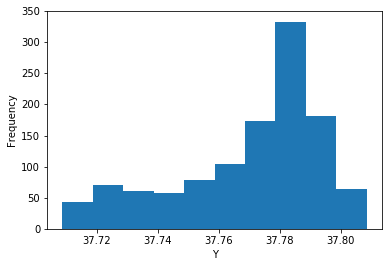

SUICIDE


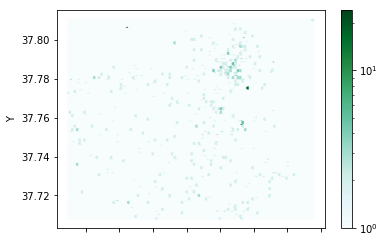

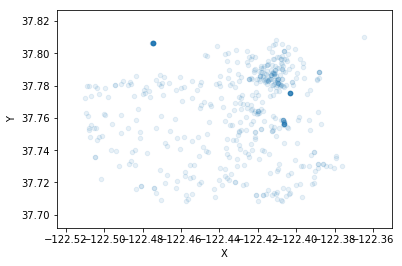

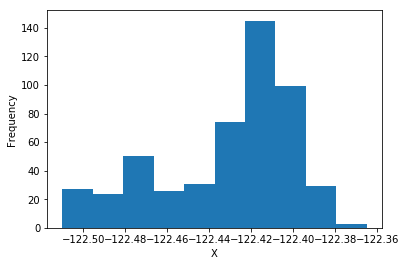

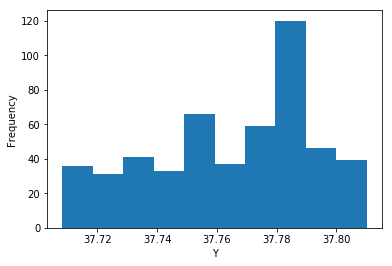

LOITERING


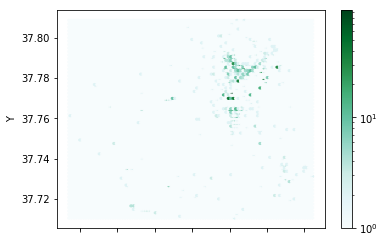

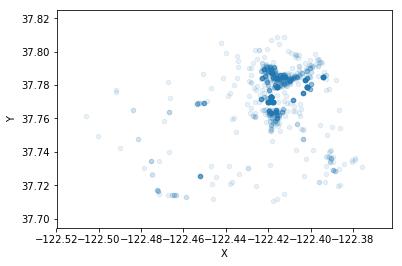

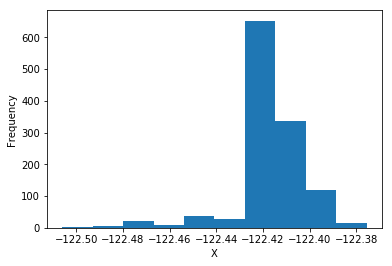

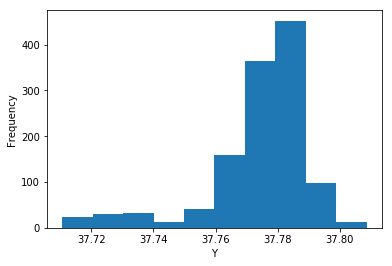

SEX OFFENSES NON FORCIBLE


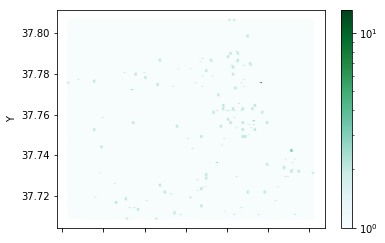

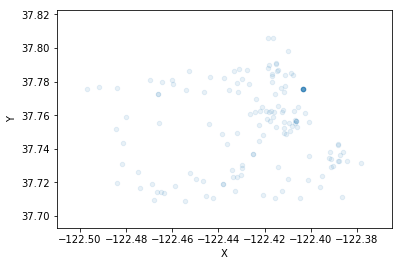

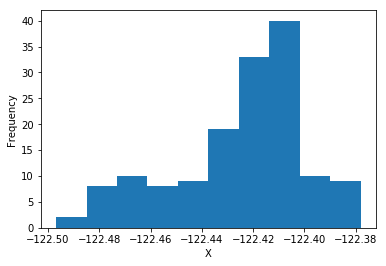

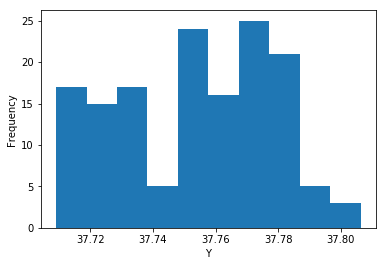

EXTORTION


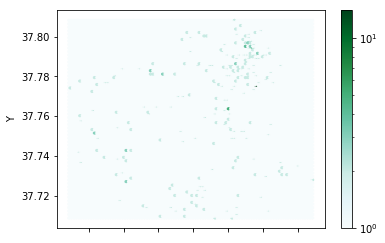

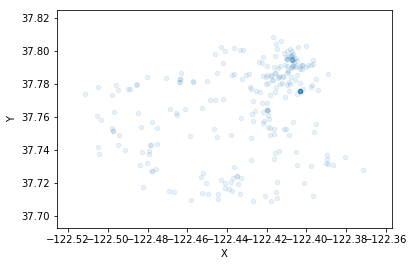

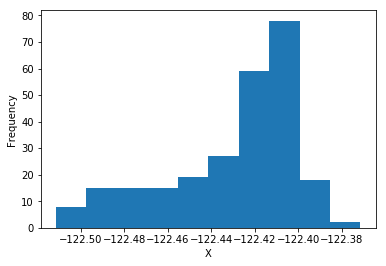

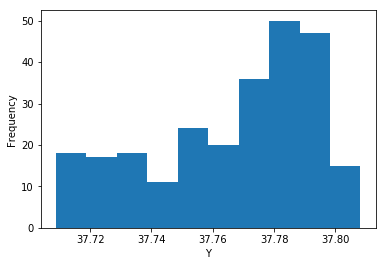

GAMBLING


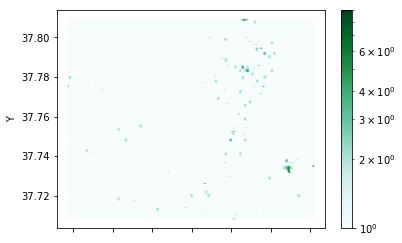

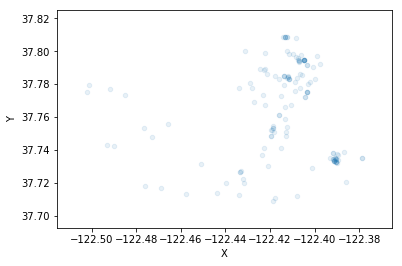

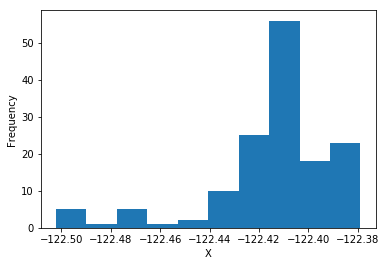

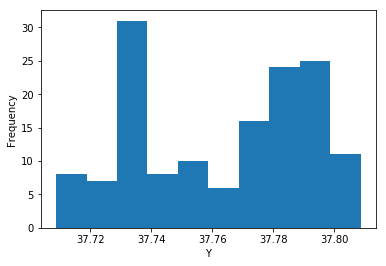

BAD CHECKS


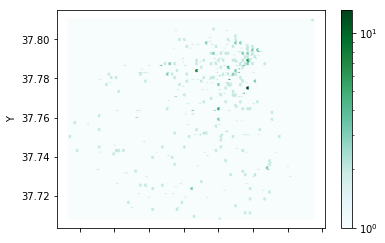

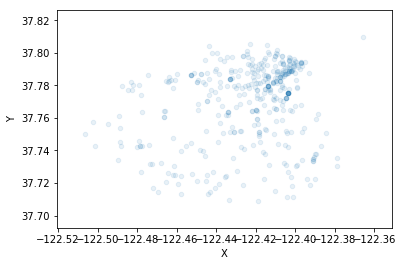

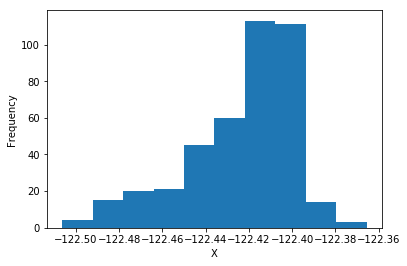

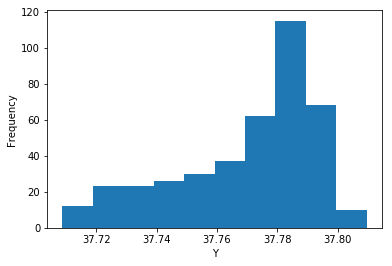

TREA


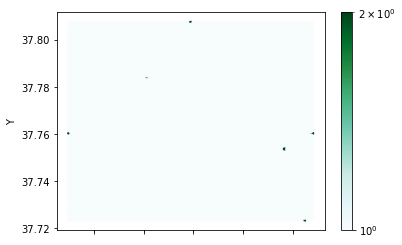

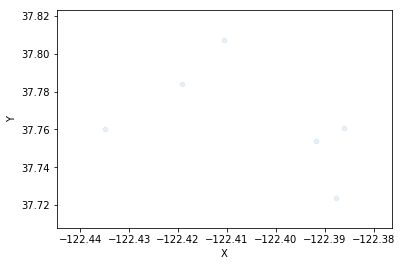

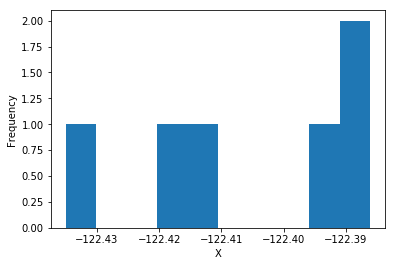

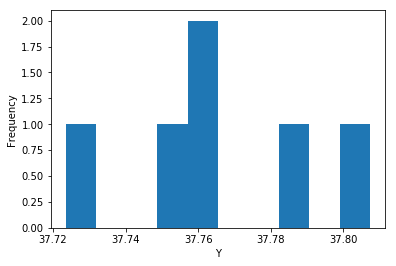

RECOVERED VEHICLE


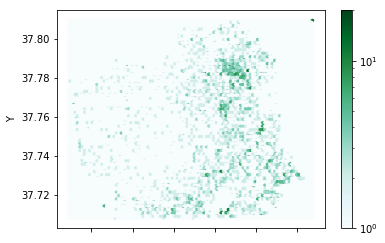

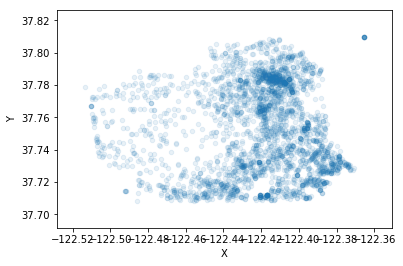

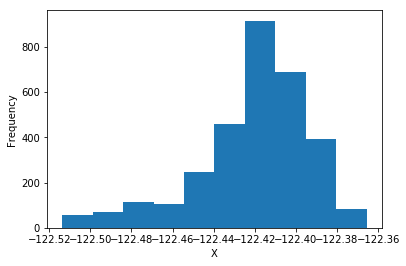

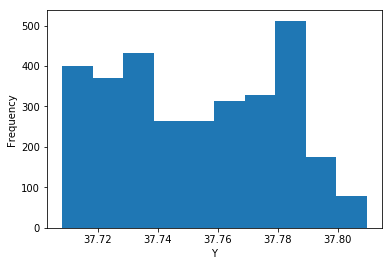

PORNOGRAPHY/OBSCENE MAT


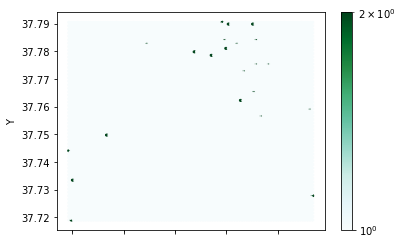

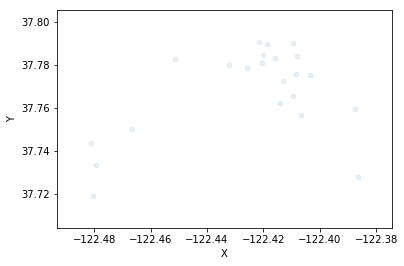

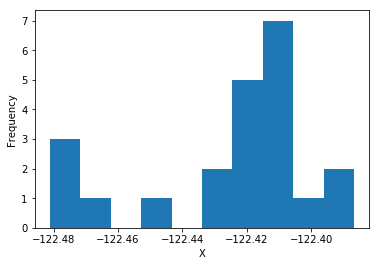

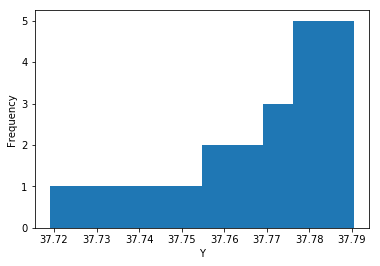

In [40]:
cats = train_pd.Category.unique()
city = train_pd[["Category", "X", "Y"]].query("Y < 50")
for cat in cats:
    print("============")
    print(cat)
    temp = city.query("Category == @cat")
    ax = temp.plot(kind = "hexbin", x = "X", y = "Y", bins = "log")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()
    ax = temp.plot(kind = "scatter", x = "X", y = "Y", alpha = 0.1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()
    ax = temp.X.plot(kind = "hist", x = "X")
    ax.set_xlabel("X")
    plt.show()
    ax = temp.Y.plot(kind = "hist", x = "Y")
    ax.set_xlabel("Y")
    plt.show()

# Date-related features and Category

* the end of months, i.e. day 31, is short of records because not all months have 31 days
* the last year is apparently short of records; we may want to oversample 2015
* there are some overall trends in the increase and decrease of certain kinds of crime over the years, but unsure if useful for classification
* the pattern in hour of day might be useful, i.e. different crimes peak at different hours

Since Dates are cyclical, we might need to further transform the features so that ML algorithms can learn that 0 adn 24 are actually close together, not 24 hours apart.

In [41]:
# create various lists of related features 
# so that we can check each feature against each Category 

fts = [
    "hour_of_day"
    , "day_of_week"
    , "day_of_month"
    , "day_of_year"
    , "week_of_year"
    , "month_of_year"
    , "quarter_of_year"
    , "year"
]

fts_delta = [
    "hour_delta"
    , "day_delta"
    , "week_delta"
    , "month_delta"
    , "year_delta"
]

fts3 = ["is_weekend", "is_holiday"]

fts_cyclical = [
    ["hour_of_day_sin", "hour_of_day_cos"]
    , ["day_of_week_sin", "day_of_week_cos"]
    , ["month_of_year_sin", "month_of_year_cos"]
]


Appears to be cyclical patterns in hour of day and day of year

hour_of_day


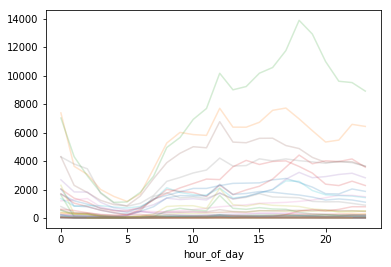

day_of_week


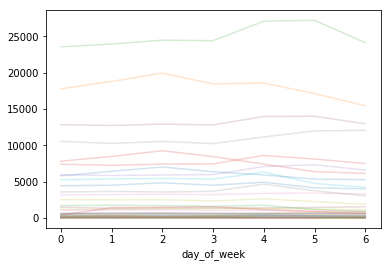

day_of_month


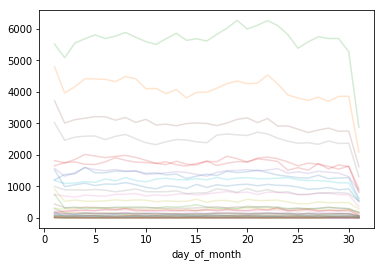

day_of_year


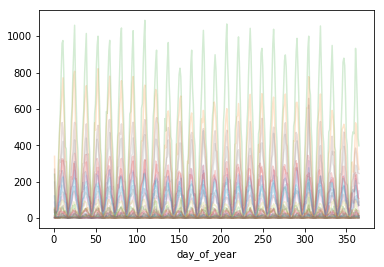

week_of_year


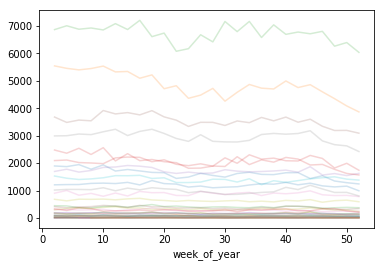

month_of_year


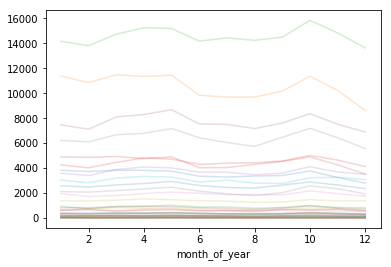

quarter_of_year


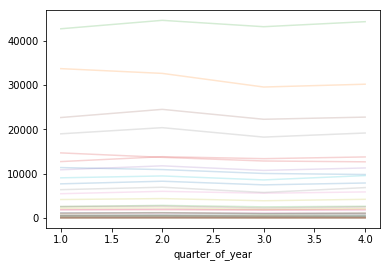

year


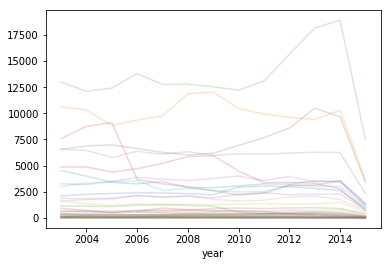

In [42]:
def t1(fts):
    cats = train_pd.Category.unique()
    crimes = train_pd[["Category"] + fts]
    for ft in fts:
        print("============")
        print(ft)
        for cat in cats:
            temp = crimes.query("Category == @cat").groupby([ft]).size()
            ax = temp.plot(alpha = 0.2)
        plt.show()

t1(fts)

Even if we plot the cyclical data in a circle, still kind of hard to see the patterns

* cyclical hour of day appears to show some pattern

Maybe it is easier for ML classifiers to learn properly with the cyclical features

    hour_of_day  hour_of_day_sin  hour_of_day_cos  counts
0             0            0.000            1.000   44865
1             1            0.259            0.966   26173
2             2            0.500            0.866   22296
3             3            0.707            0.707   14014
4             4            0.866            0.500    9863
5             5            0.966            0.259    8637
6             6            1.000           -0.000   13133
7             7            0.966           -0.259   22048
8             8            0.866           -0.500   32900
9             9            0.707           -0.707   35555
10           10            0.500           -0.866   37806
11           11            0.259           -0.966   38373
12           12            0.000           -1.000   51934
13           13           -0.259           -0.966   43145
14           14           -0.500           -0.866   44424
15           15           -0.707           -0.707   48058
16           1

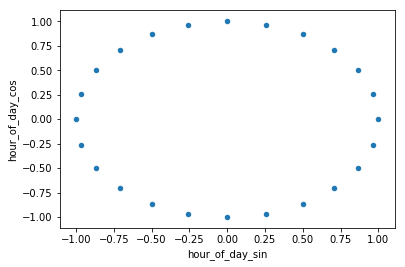

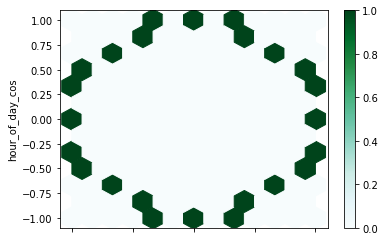

   day_of_week  day_of_week_sin  day_of_week_cos  counts
0            0            0.000            1.000  121584
1            1            0.782            0.623  124965
2            2            0.975           -0.223  129211
3            3            0.434           -0.901  125038
4            4           -0.434           -0.901  133734
5            5           -0.975           -0.223  126810
6            6           -0.782            0.623  116707


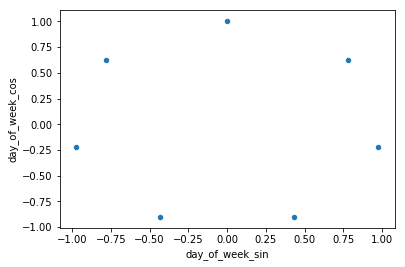

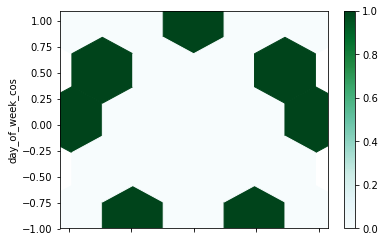

    month_of_year  month_of_year_sin  month_of_year_cos  counts
0               1              0.000              1.000   73536
1               2              0.500              0.866   70813
2               3              0.866              0.500   76320
3               4              1.000              0.000   78096
4               5              0.866             -0.500   79644
5               6              0.500             -0.866   70892
6               7              0.000             -1.000   69971
7               8             -0.500             -0.866   68540
8               9             -0.866             -0.500   71982
9              10             -1.000              0.000   80274
10             11             -0.866              0.500   72975
11             12             -0.500              0.866   65006


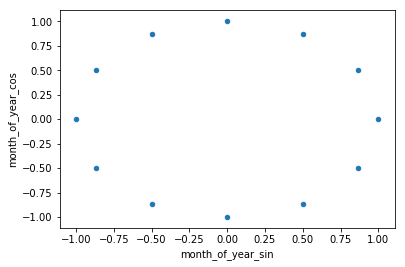

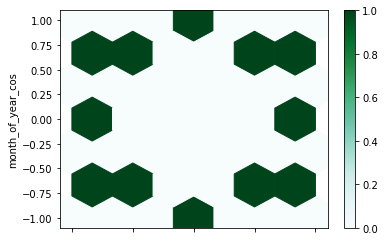

In [48]:
def show_example(f, fs, fc, gr):
    test = train_pd.groupby([f, fs, fc]).size().reset_index(name='counts')
    print(test)
    _ = test.plot.scatter(x = fs, y = fc)
    plt.show()
    _ = test.plot.hexbin(x = fs, y = fc, gridsize = gr)
    plt.show()

# example of hour of day, and its sin and cos
show_example("hour_of_day", "hour_of_day_sin", "hour_of_day_cos", 12)

# example of day of week, and its sin and cos
show_example("day_of_week", "day_of_week_sin", "day_of_week_cos", 4)

# example of month of year, and its sin and cos
show_example("month_of_year", "month_of_year_sin", "month_of_year_cos", 6)

['hour_of_day_sin', 'hour_of_day_cos'] and WARRANTS


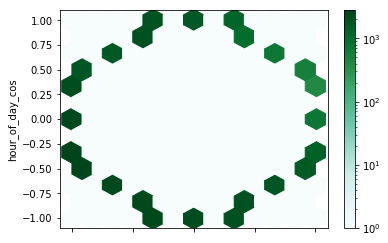

['hour_of_day_sin', 'hour_of_day_cos'] and OTHER OFFENSES


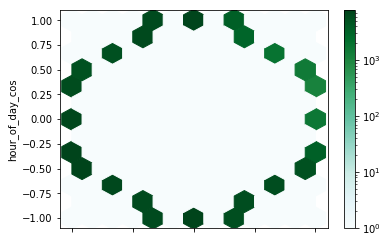

['hour_of_day_sin', 'hour_of_day_cos'] and LARCENY/THEFT


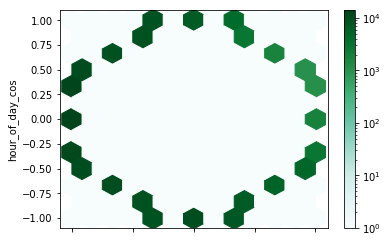

['hour_of_day_sin', 'hour_of_day_cos'] and VEHICLE THEFT


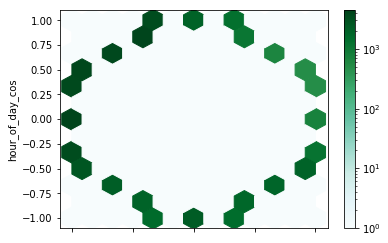

['hour_of_day_sin', 'hour_of_day_cos'] and VANDALISM


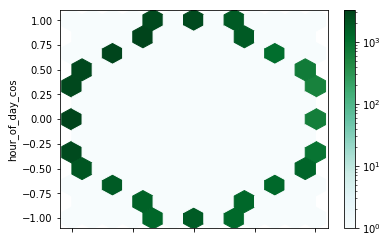

['hour_of_day_sin', 'hour_of_day_cos'] and NON-CRIMINAL


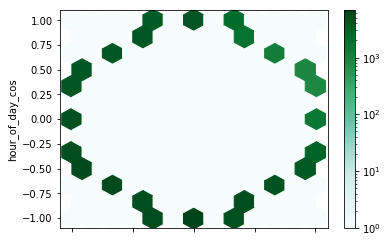

['hour_of_day_sin', 'hour_of_day_cos'] and ROBBERY


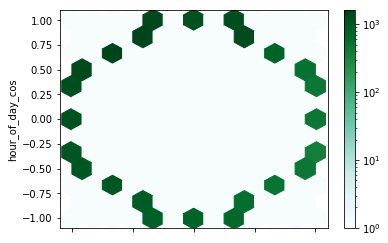

['hour_of_day_sin', 'hour_of_day_cos'] and ASSAULT


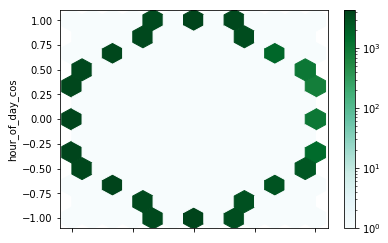

['hour_of_day_sin', 'hour_of_day_cos'] and WEAPON LAWS


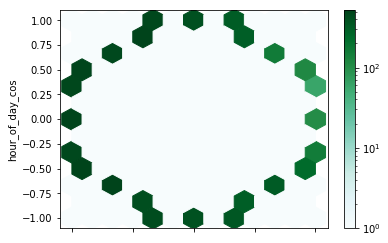

['hour_of_day_sin', 'hour_of_day_cos'] and BURGLARY


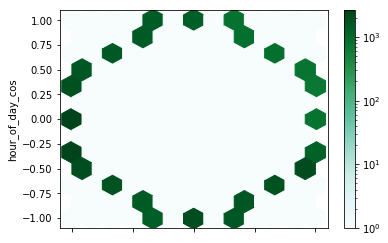

['hour_of_day_sin', 'hour_of_day_cos'] and SUSPICIOUS OCC


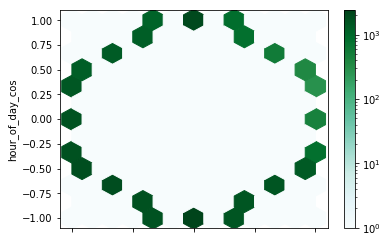

['hour_of_day_sin', 'hour_of_day_cos'] and DRUNKENNESS


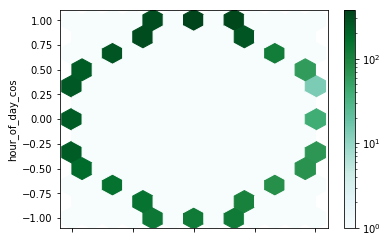

['hour_of_day_sin', 'hour_of_day_cos'] and FORGERY/COUNTERFEITING


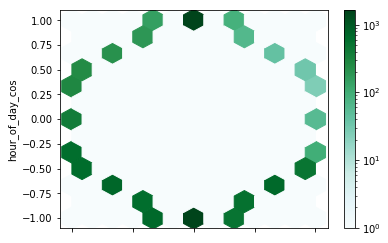

['hour_of_day_sin', 'hour_of_day_cos'] and DRUG/NARCOTIC


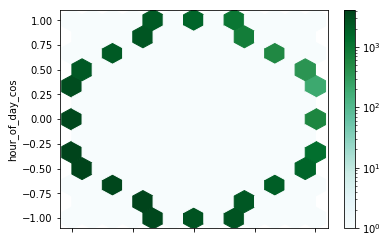

['hour_of_day_sin', 'hour_of_day_cos'] and STOLEN PROPERTY


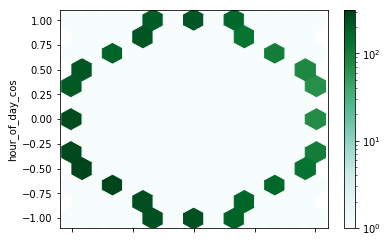

['hour_of_day_sin', 'hour_of_day_cos'] and SECONDARY CODES


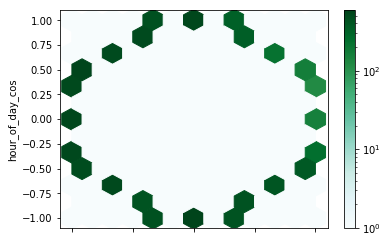

['hour_of_day_sin', 'hour_of_day_cos'] and TRESPASS


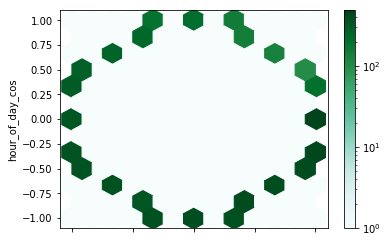

['hour_of_day_sin', 'hour_of_day_cos'] and MISSING PERSON


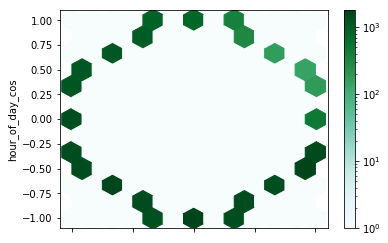

['hour_of_day_sin', 'hour_of_day_cos'] and FRAUD


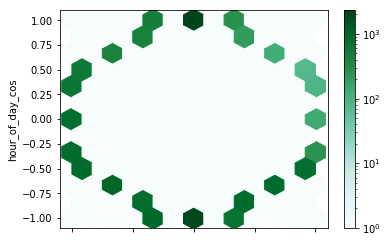

['hour_of_day_sin', 'hour_of_day_cos'] and KIDNAPPING


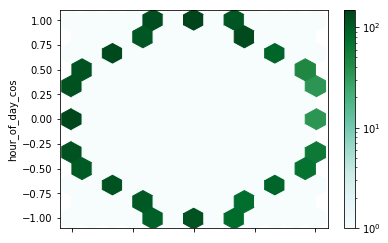

['hour_of_day_sin', 'hour_of_day_cos'] and RUNAWAY


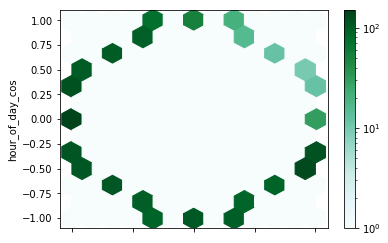

['hour_of_day_sin', 'hour_of_day_cos'] and DRIVING UNDER THE INFLUENCE


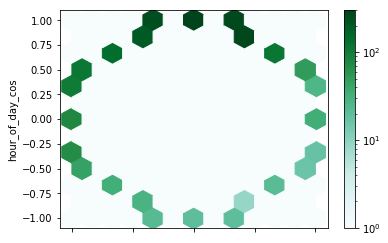

['hour_of_day_sin', 'hour_of_day_cos'] and SEX OFFENSES FORCIBLE


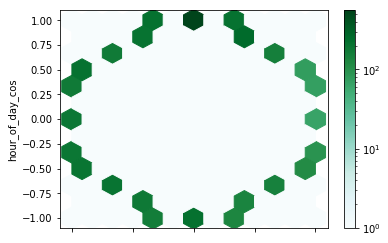

['hour_of_day_sin', 'hour_of_day_cos'] and PROSTITUTION


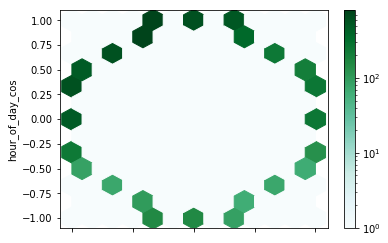

['hour_of_day_sin', 'hour_of_day_cos'] and DISORDERLY CONDUCT


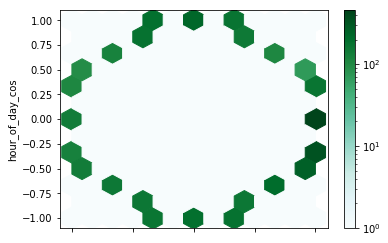

['hour_of_day_sin', 'hour_of_day_cos'] and ARSON


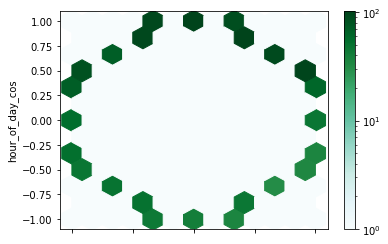

['hour_of_day_sin', 'hour_of_day_cos'] and FAMILY OFFENSES


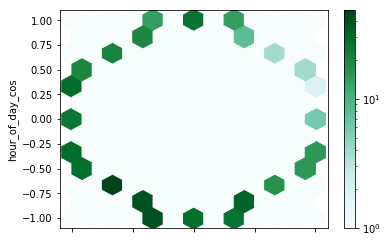

['hour_of_day_sin', 'hour_of_day_cos'] and LIQUOR LAWS


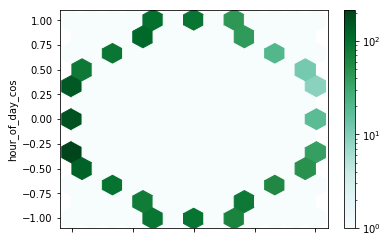

['hour_of_day_sin', 'hour_of_day_cos'] and BRIBERY


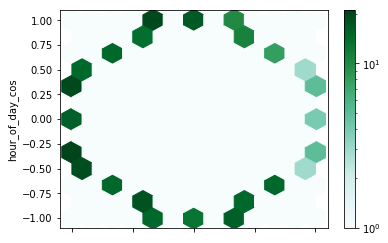

['hour_of_day_sin', 'hour_of_day_cos'] and EMBEZZLEMENT


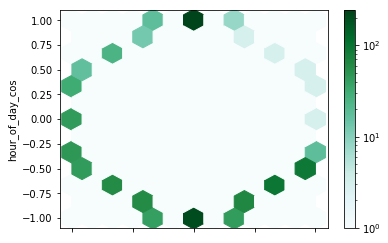

['hour_of_day_sin', 'hour_of_day_cos'] and SUICIDE


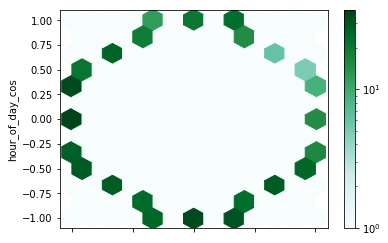

['hour_of_day_sin', 'hour_of_day_cos'] and LOITERING


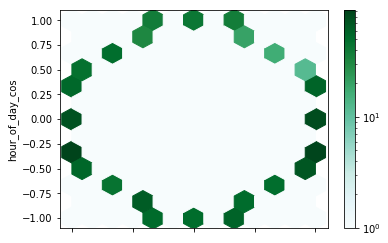

['hour_of_day_sin', 'hour_of_day_cos'] and SEX OFFENSES NON FORCIBLE


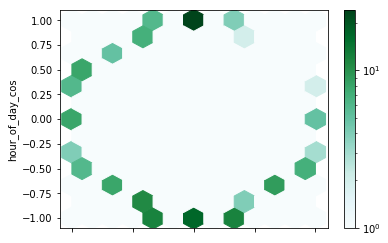

['hour_of_day_sin', 'hour_of_day_cos'] and EXTORTION


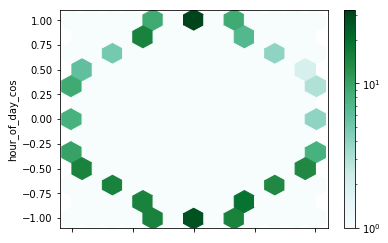

['hour_of_day_sin', 'hour_of_day_cos'] and GAMBLING


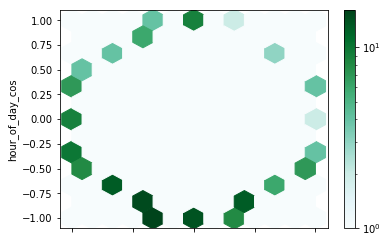

['hour_of_day_sin', 'hour_of_day_cos'] and BAD CHECKS


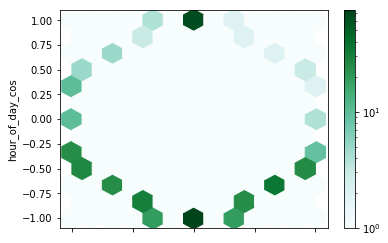

['hour_of_day_sin', 'hour_of_day_cos'] and TREA


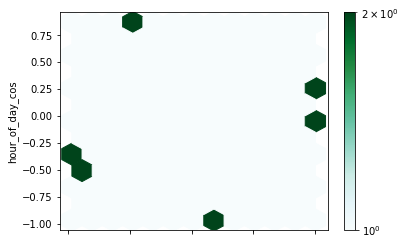

['hour_of_day_sin', 'hour_of_day_cos'] and RECOVERED VEHICLE


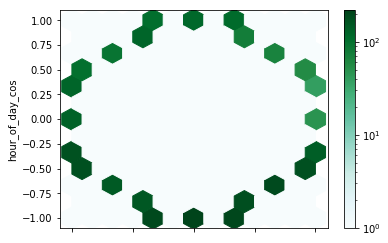

['hour_of_day_sin', 'hour_of_day_cos'] and PORNOGRAPHY/OBSCENE MAT


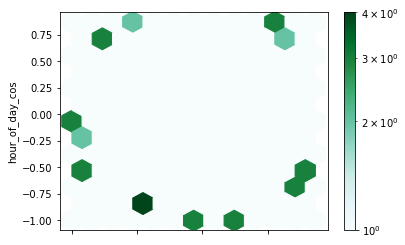

['day_of_week_sin', 'day_of_week_cos'] and WARRANTS


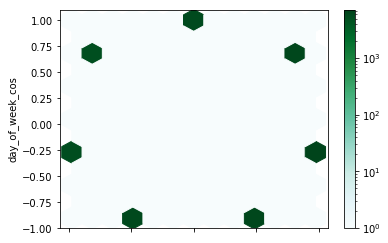

['day_of_week_sin', 'day_of_week_cos'] and OTHER OFFENSES


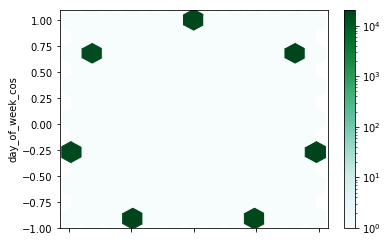

['day_of_week_sin', 'day_of_week_cos'] and LARCENY/THEFT


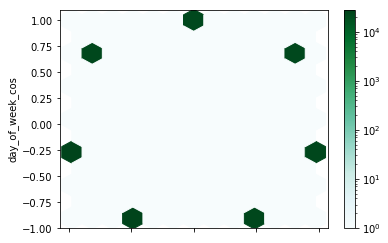

['day_of_week_sin', 'day_of_week_cos'] and VEHICLE THEFT


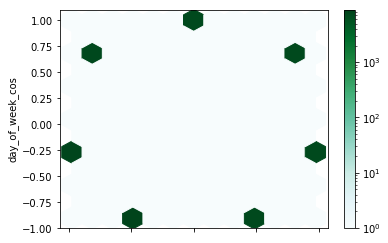

['day_of_week_sin', 'day_of_week_cos'] and VANDALISM


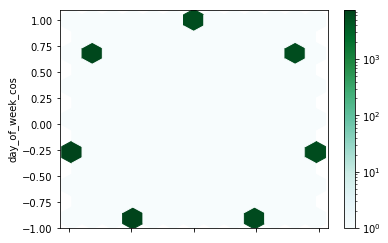

['day_of_week_sin', 'day_of_week_cos'] and NON-CRIMINAL


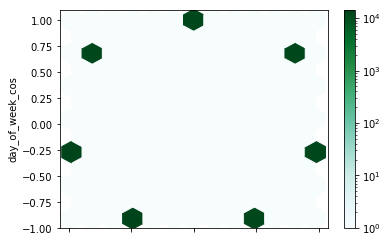

['day_of_week_sin', 'day_of_week_cos'] and ROBBERY


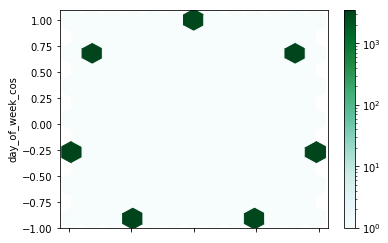

['day_of_week_sin', 'day_of_week_cos'] and ASSAULT


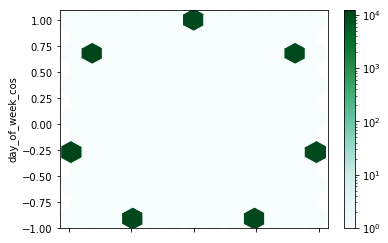

['day_of_week_sin', 'day_of_week_cos'] and WEAPON LAWS


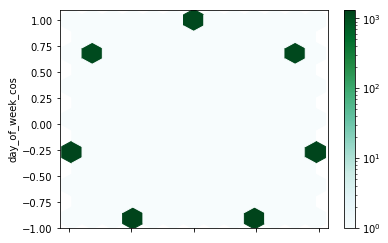

['day_of_week_sin', 'day_of_week_cos'] and BURGLARY


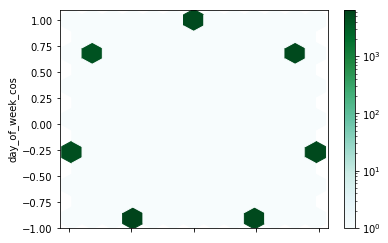

['day_of_week_sin', 'day_of_week_cos'] and SUSPICIOUS OCC


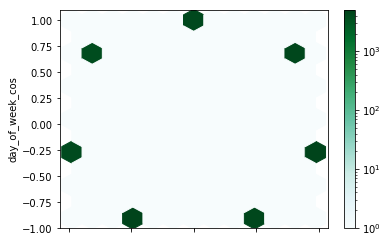

['day_of_week_sin', 'day_of_week_cos'] and DRUNKENNESS


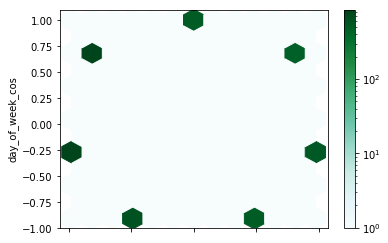

['day_of_week_sin', 'day_of_week_cos'] and FORGERY/COUNTERFEITING


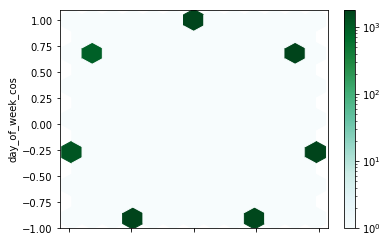

['day_of_week_sin', 'day_of_week_cos'] and DRUG/NARCOTIC


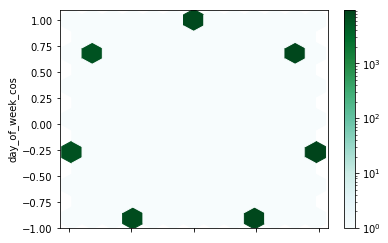

['day_of_week_sin', 'day_of_week_cos'] and STOLEN PROPERTY


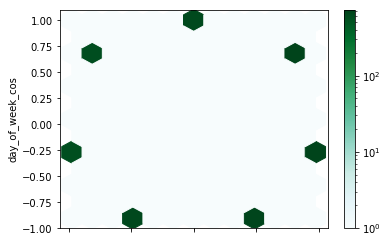

['day_of_week_sin', 'day_of_week_cos'] and SECONDARY CODES


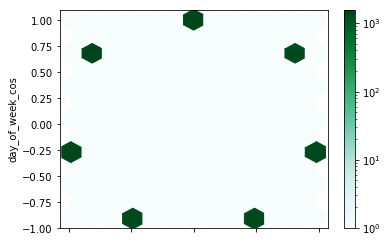

['day_of_week_sin', 'day_of_week_cos'] and TRESPASS


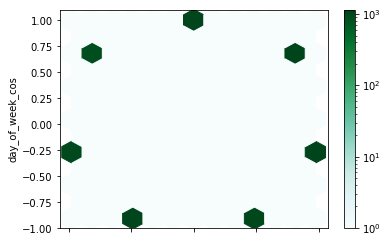

['day_of_week_sin', 'day_of_week_cos'] and MISSING PERSON


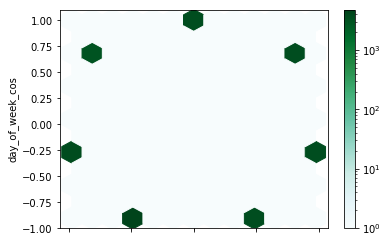

['day_of_week_sin', 'day_of_week_cos'] and FRAUD


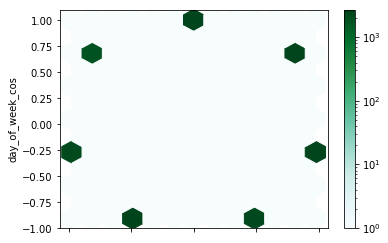

['day_of_week_sin', 'day_of_week_cos'] and KIDNAPPING


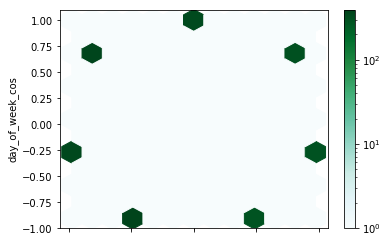

['day_of_week_sin', 'day_of_week_cos'] and RUNAWAY


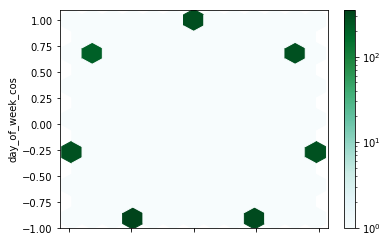

['day_of_week_sin', 'day_of_week_cos'] and DRIVING UNDER THE INFLUENCE


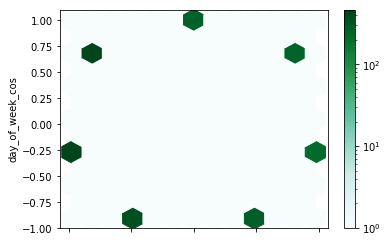

['day_of_week_sin', 'day_of_week_cos'] and SEX OFFENSES FORCIBLE


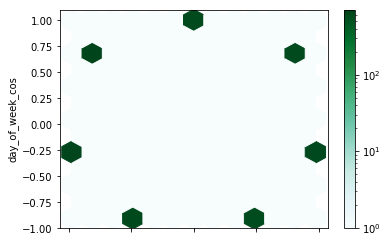

['day_of_week_sin', 'day_of_week_cos'] and PROSTITUTION


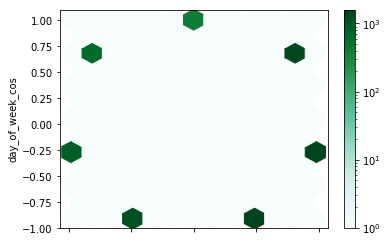

['day_of_week_sin', 'day_of_week_cos'] and DISORDERLY CONDUCT


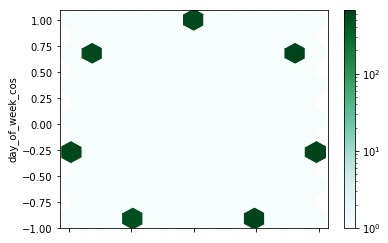

['day_of_week_sin', 'day_of_week_cos'] and ARSON


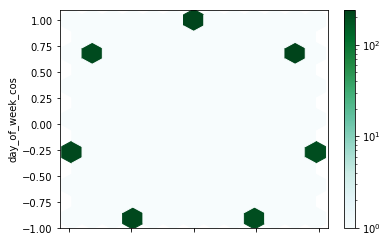

['day_of_week_sin', 'day_of_week_cos'] and FAMILY OFFENSES


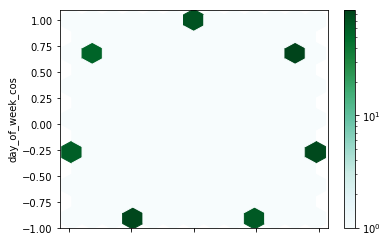

['day_of_week_sin', 'day_of_week_cos'] and LIQUOR LAWS


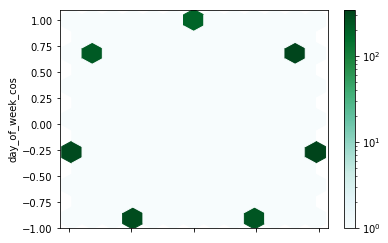

['day_of_week_sin', 'day_of_week_cos'] and BRIBERY


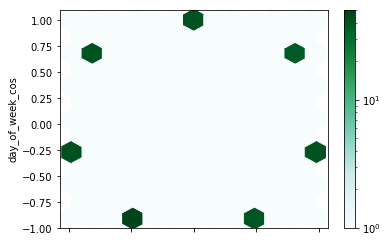

['day_of_week_sin', 'day_of_week_cos'] and EMBEZZLEMENT


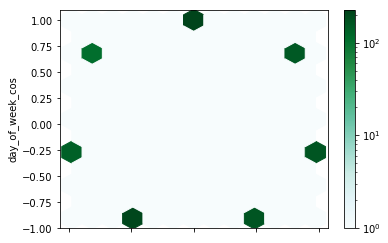

['day_of_week_sin', 'day_of_week_cos'] and SUICIDE


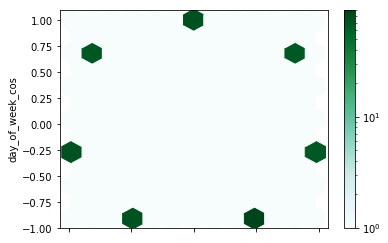

['day_of_week_sin', 'day_of_week_cos'] and LOITERING


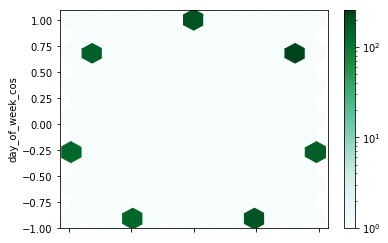

['day_of_week_sin', 'day_of_week_cos'] and SEX OFFENSES NON FORCIBLE


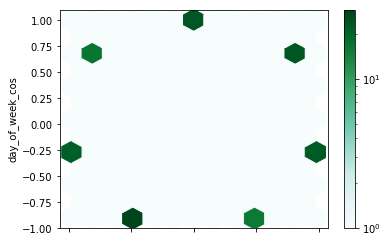

['day_of_week_sin', 'day_of_week_cos'] and EXTORTION


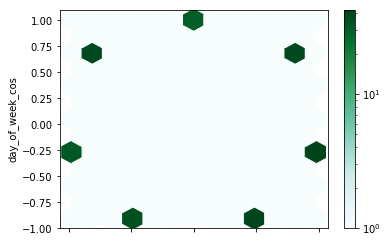

['day_of_week_sin', 'day_of_week_cos'] and GAMBLING


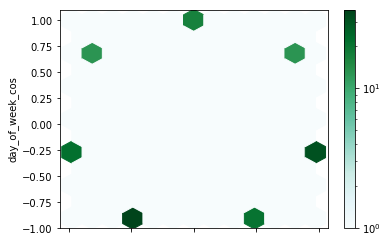

['day_of_week_sin', 'day_of_week_cos'] and BAD CHECKS


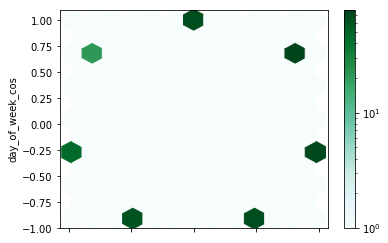

['day_of_week_sin', 'day_of_week_cos'] and TREA


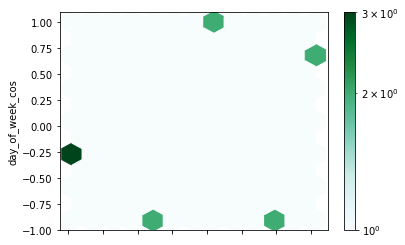

['day_of_week_sin', 'day_of_week_cos'] and RECOVERED VEHICLE


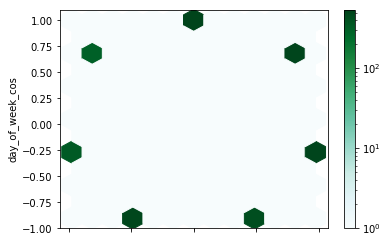

['day_of_week_sin', 'day_of_week_cos'] and PORNOGRAPHY/OBSCENE MAT


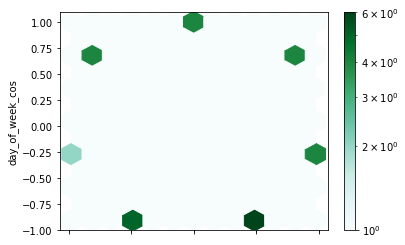

['month_of_year_sin', 'month_of_year_cos'] and WARRANTS


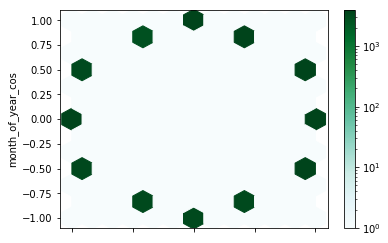

['month_of_year_sin', 'month_of_year_cos'] and OTHER OFFENSES


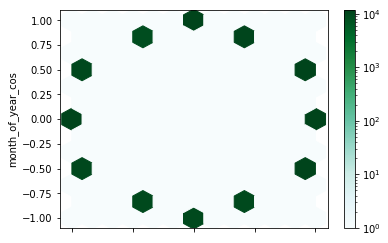

['month_of_year_sin', 'month_of_year_cos'] and LARCENY/THEFT


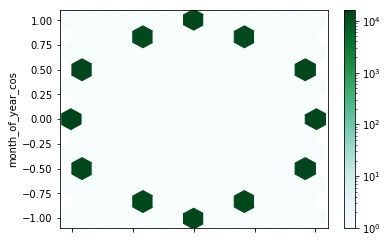

['month_of_year_sin', 'month_of_year_cos'] and VEHICLE THEFT


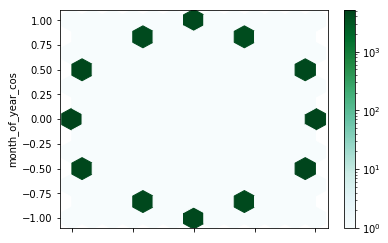

['month_of_year_sin', 'month_of_year_cos'] and VANDALISM


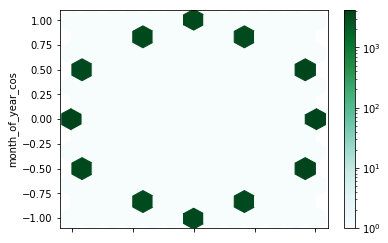

['month_of_year_sin', 'month_of_year_cos'] and NON-CRIMINAL


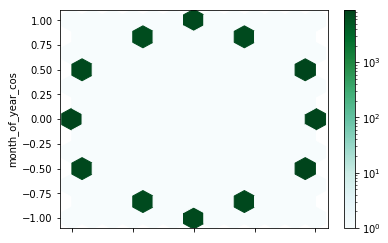

['month_of_year_sin', 'month_of_year_cos'] and ROBBERY


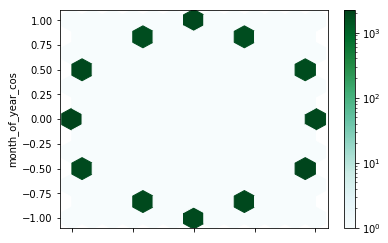

['month_of_year_sin', 'month_of_year_cos'] and ASSAULT


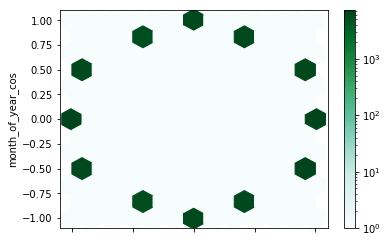

['month_of_year_sin', 'month_of_year_cos'] and WEAPON LAWS


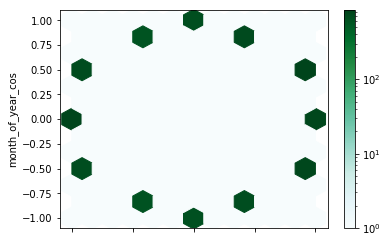

['month_of_year_sin', 'month_of_year_cos'] and BURGLARY


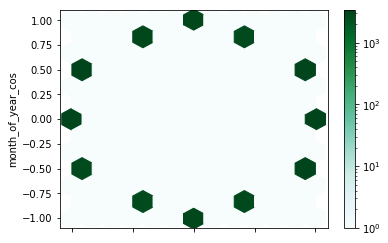

['month_of_year_sin', 'month_of_year_cos'] and SUSPICIOUS OCC


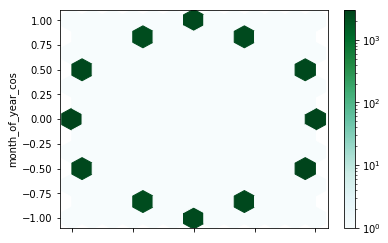

['month_of_year_sin', 'month_of_year_cos'] and DRUNKENNESS


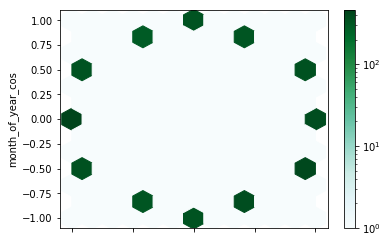

['month_of_year_sin', 'month_of_year_cos'] and FORGERY/COUNTERFEITING


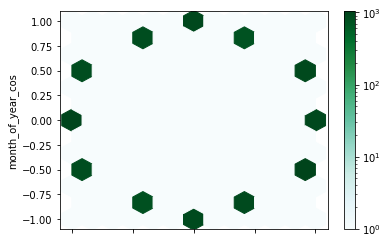

['month_of_year_sin', 'month_of_year_cos'] and DRUG/NARCOTIC


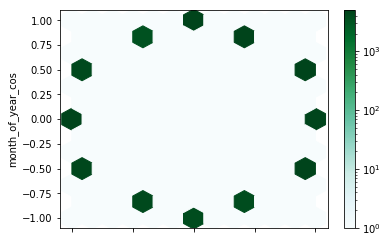

['month_of_year_sin', 'month_of_year_cos'] and STOLEN PROPERTY


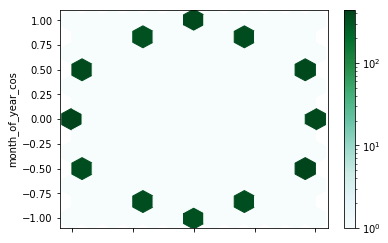

['month_of_year_sin', 'month_of_year_cos'] and SECONDARY CODES


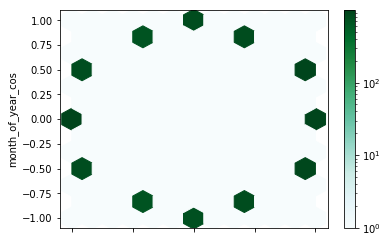

['month_of_year_sin', 'month_of_year_cos'] and TRESPASS


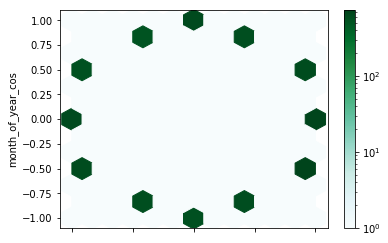

['month_of_year_sin', 'month_of_year_cos'] and MISSING PERSON


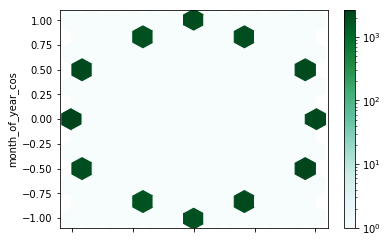

['month_of_year_sin', 'month_of_year_cos'] and FRAUD


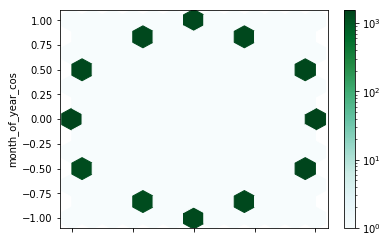

['month_of_year_sin', 'month_of_year_cos'] and KIDNAPPING


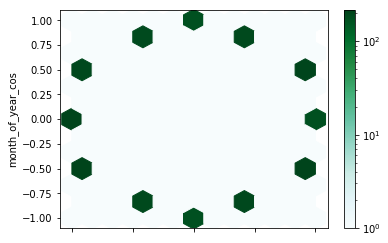

['month_of_year_sin', 'month_of_year_cos'] and RUNAWAY


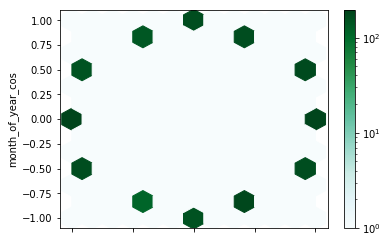

['month_of_year_sin', 'month_of_year_cos'] and DRIVING UNDER THE INFLUENCE


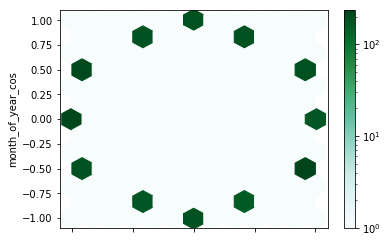

['month_of_year_sin', 'month_of_year_cos'] and SEX OFFENSES FORCIBLE


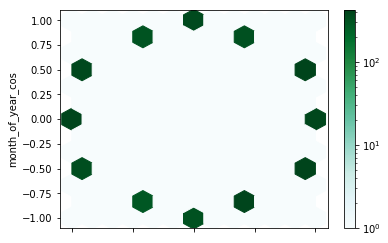

['month_of_year_sin', 'month_of_year_cos'] and PROSTITUTION


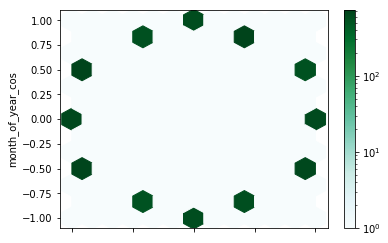

['month_of_year_sin', 'month_of_year_cos'] and DISORDERLY CONDUCT


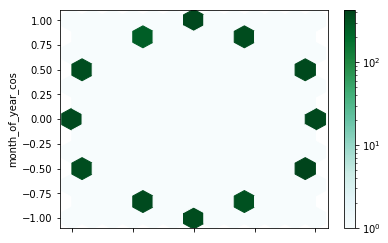

['month_of_year_sin', 'month_of_year_cos'] and ARSON


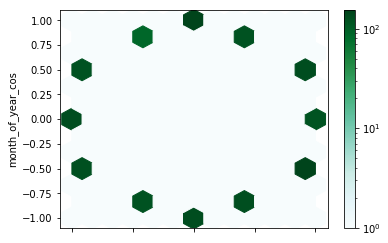

['month_of_year_sin', 'month_of_year_cos'] and FAMILY OFFENSES


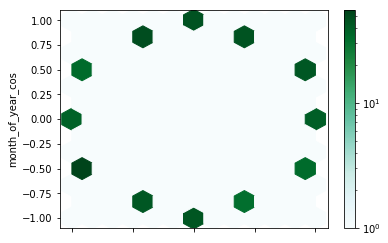

['month_of_year_sin', 'month_of_year_cos'] and LIQUOR LAWS


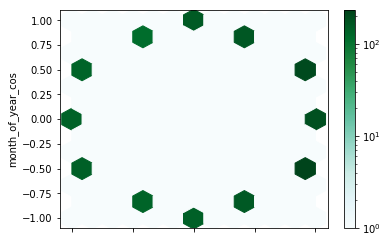

['month_of_year_sin', 'month_of_year_cos'] and BRIBERY


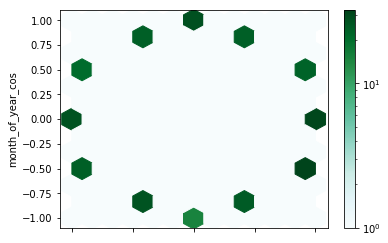

['month_of_year_sin', 'month_of_year_cos'] and EMBEZZLEMENT


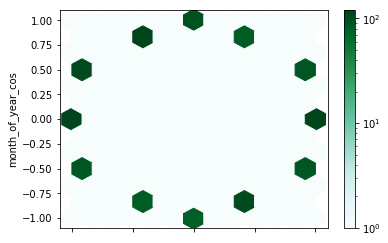

['month_of_year_sin', 'month_of_year_cos'] and SUICIDE


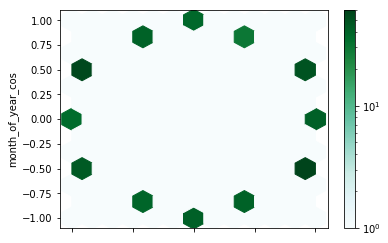

['month_of_year_sin', 'month_of_year_cos'] and LOITERING


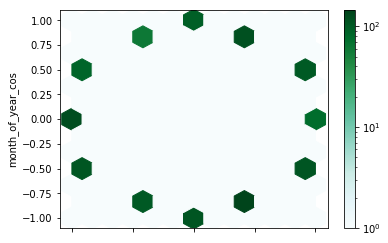

['month_of_year_sin', 'month_of_year_cos'] and SEX OFFENSES NON FORCIBLE


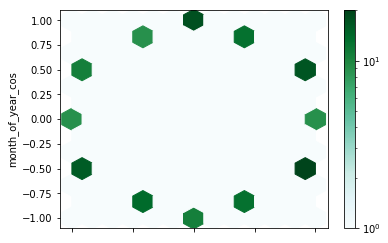

['month_of_year_sin', 'month_of_year_cos'] and EXTORTION


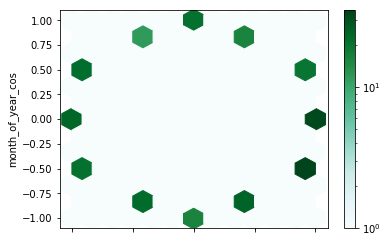

['month_of_year_sin', 'month_of_year_cos'] and GAMBLING


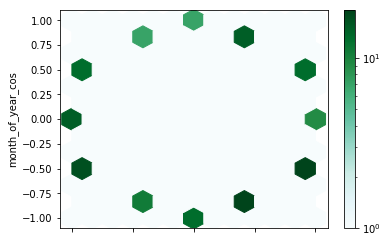

['month_of_year_sin', 'month_of_year_cos'] and BAD CHECKS


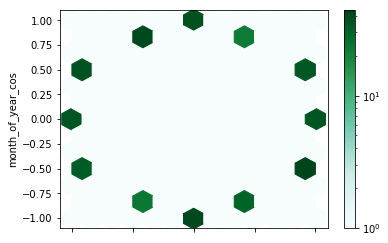

['month_of_year_sin', 'month_of_year_cos'] and TREA


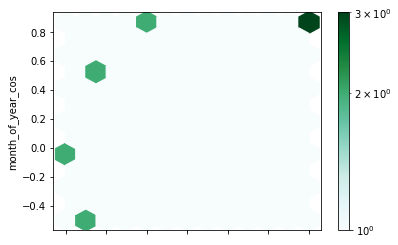

['month_of_year_sin', 'month_of_year_cos'] and RECOVERED VEHICLE


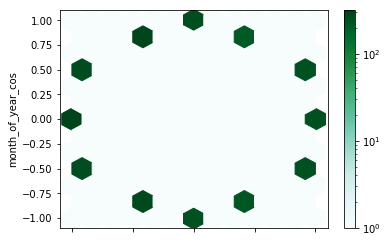

['month_of_year_sin', 'month_of_year_cos'] and PORNOGRAPHY/OBSCENE MAT


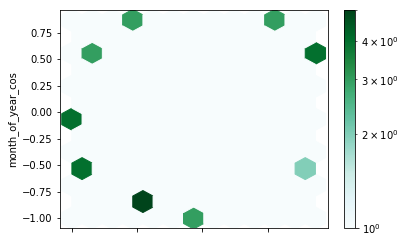

In [44]:
def t5(fts):
    fts_flat = [f for ft in fts for f in ft]
    cats = train_pd.Category.unique()
    crimes = train_pd[["Category"] + fts_flat]
    for ft in fts:
        print("============")
        for cat in cats:
            print(ft, "and", cat)
            temp = crimes.query("Category == @cat")[ft]
            ax = temp.plot.hexbin(x = ft[0], y = ft[1], bins = "log", gridsize = 12)
            plt.show()
    
t5(fts_cyclical)

Cumulative sum of the delta features don't appear to be showing any useful pattern

hour_delta


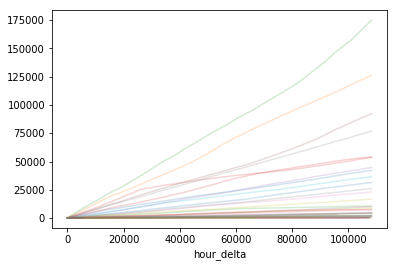

day_delta


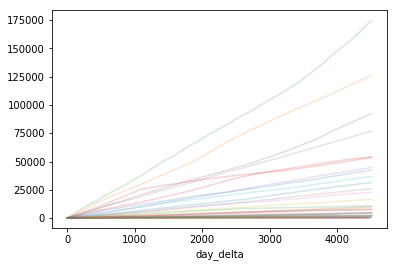

week_delta


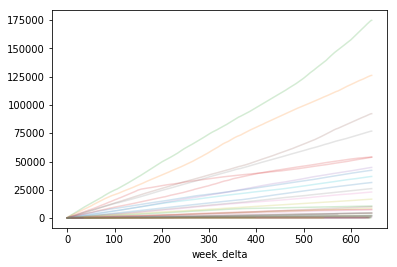

month_delta


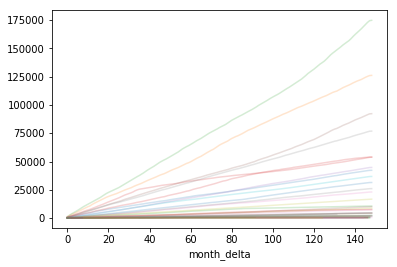

year_delta


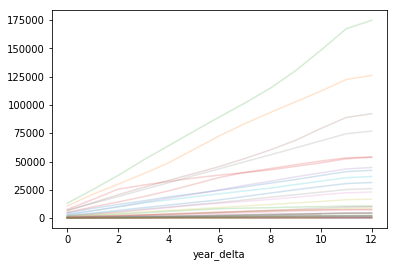

In [45]:
def t2(fts):
    cats = train_pd.Category.unique()
    crimes = train_pd[["Category"] + fts]
    for ft in fts:
        print("============")
        print(ft)
        for cat in cats:
            temp = crimes.query("Category == @cat").groupby([ft]).size().cumsum()
            ax = temp.plot(alpha = 0.2)
        plt.show()
        
t2(fts_delta)

TODO find out why there is a spike of crime at around hour 7000, and just before day 3000 ???

hour_delta


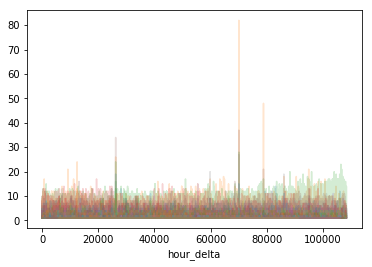

day_delta


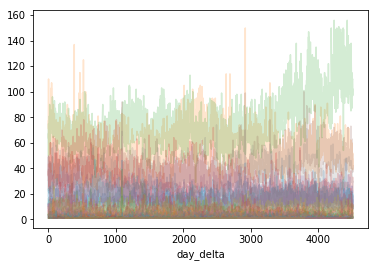

week_delta


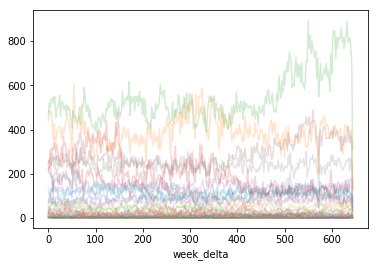

month_delta


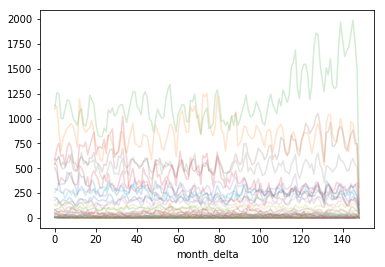

year_delta


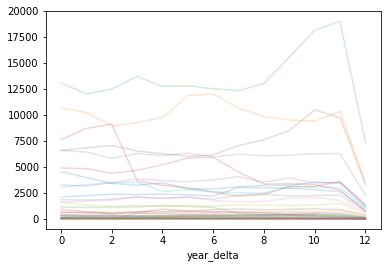

In [46]:
def t3(fts):
    cats = train_pd.Category.unique()
    crimes = train_pd[["Category"] + fts]
    for ft in fts:
        print("============")
        print(ft)
        for cat in cats:
            temp = crimes.query("Category == @cat").groupby([ft]).size()
            ax = temp.plot(alpha = 0.2)
        plt.show()

t3(fts_delta)

the is_holiday and is_weekend features by themselves don't seem to have much pattern

* probably have to be combined with other features

is_weekend and WARRANTS


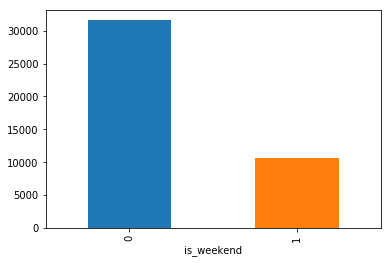

is_weekend and OTHER OFFENSES


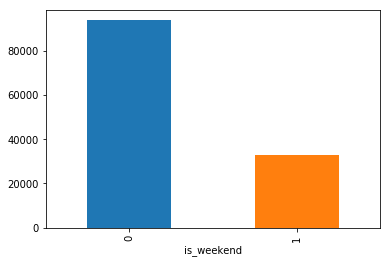

is_weekend and LARCENY/THEFT


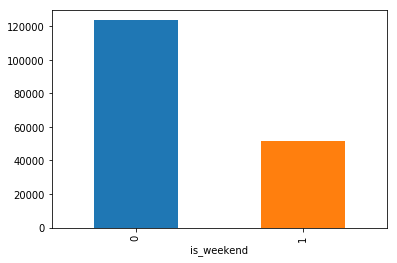

is_weekend and VEHICLE THEFT


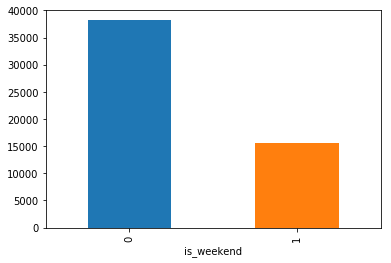

is_weekend and VANDALISM


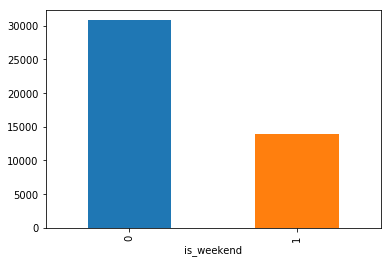

is_weekend and NON-CRIMINAL


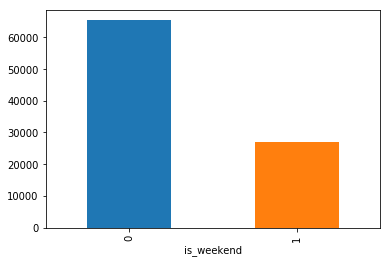

is_weekend and ROBBERY


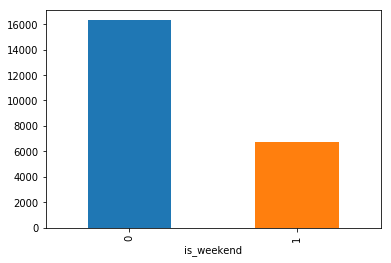

is_weekend and ASSAULT


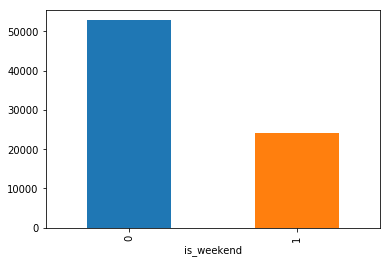

is_weekend and WEAPON LAWS


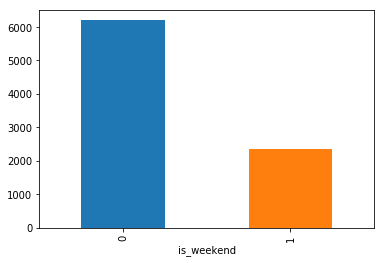

is_weekend and BURGLARY


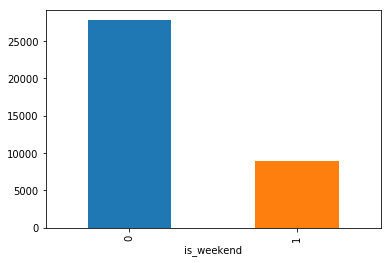

is_weekend and SUSPICIOUS OCC


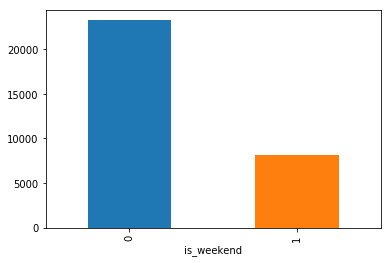

is_weekend and DRUNKENNESS


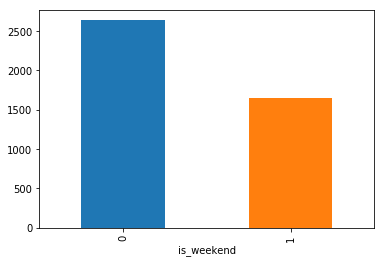

is_weekend and FORGERY/COUNTERFEITING


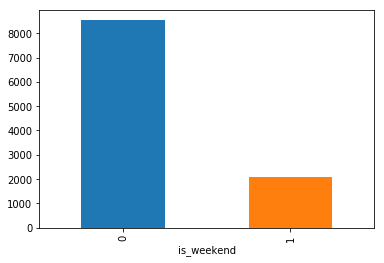

is_weekend and DRUG/NARCOTIC


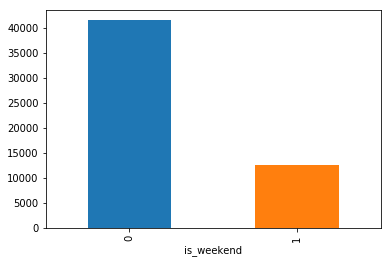

is_weekend and STOLEN PROPERTY


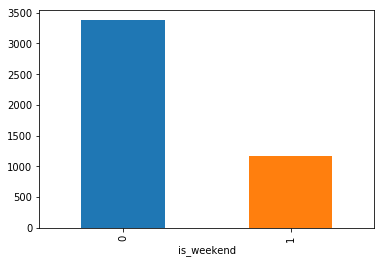

is_weekend and SECONDARY CODES


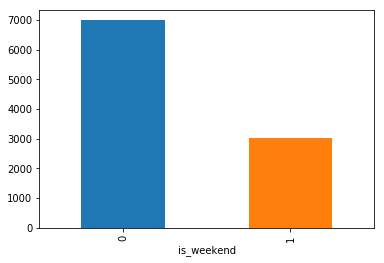

is_weekend and TRESPASS


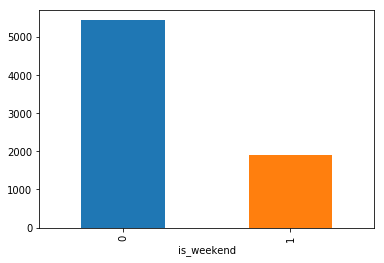

is_weekend and MISSING PERSON


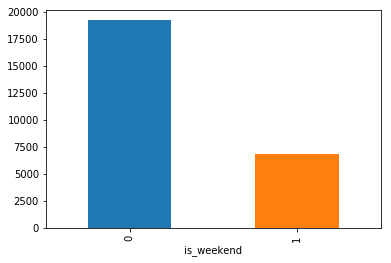

is_weekend and FRAUD


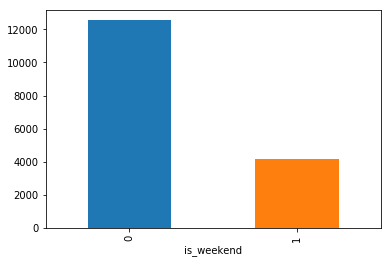

is_weekend and KIDNAPPING


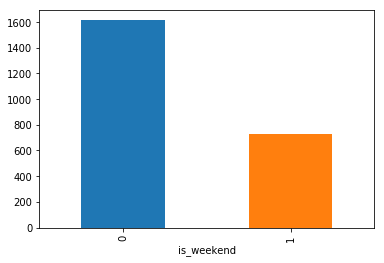

is_weekend and RUNAWAY


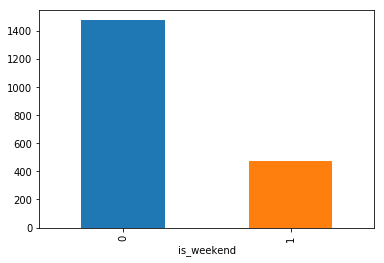

is_weekend and DRIVING UNDER THE INFLUENCE


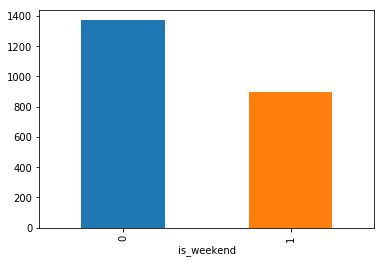

is_weekend and SEX OFFENSES FORCIBLE


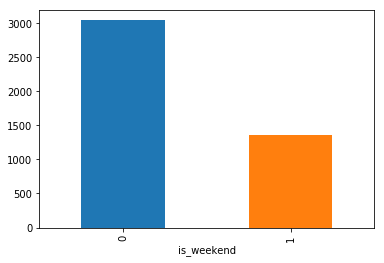

is_weekend and PROSTITUTION


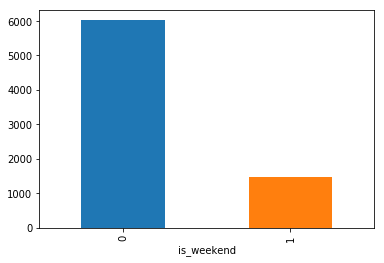

is_weekend and DISORDERLY CONDUCT


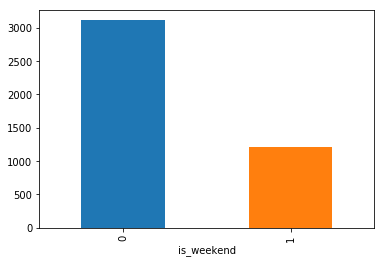

is_weekend and ARSON


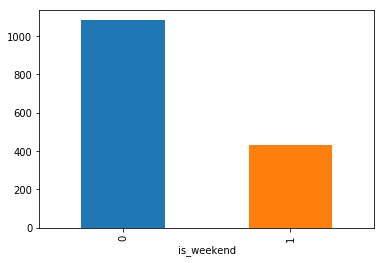

is_weekend and FAMILY OFFENSES


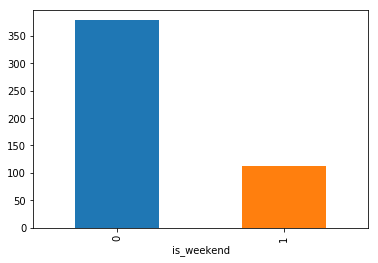

is_weekend and LIQUOR LAWS


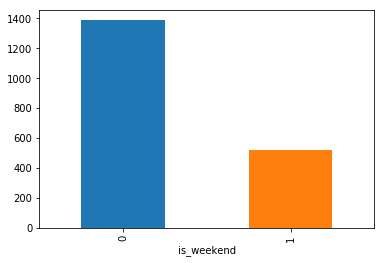

is_weekend and BRIBERY


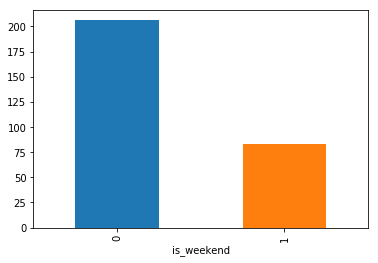

is_weekend and EMBEZZLEMENT


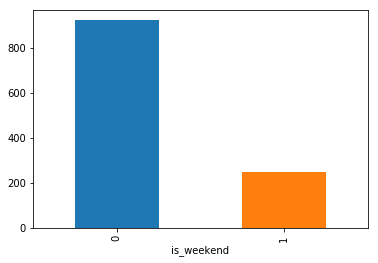

is_weekend and SUICIDE


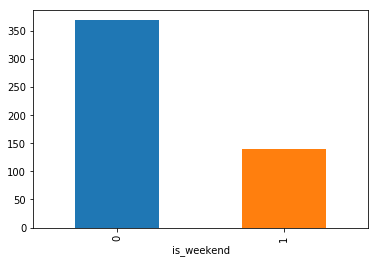

is_weekend and LOITERING


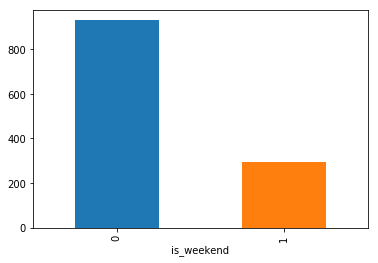

is_weekend and SEX OFFENSES NON FORCIBLE


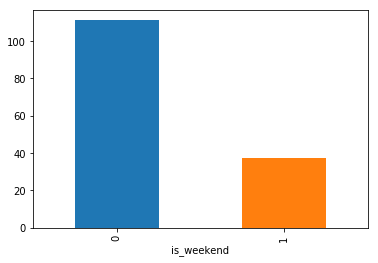

is_weekend and EXTORTION


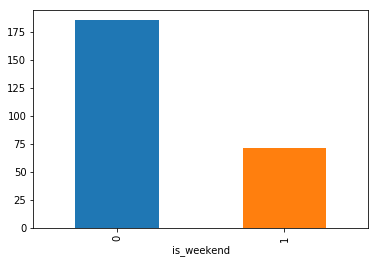

is_weekend and GAMBLING


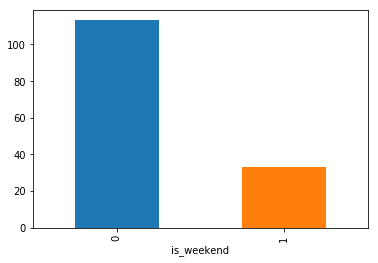

is_weekend and BAD CHECKS


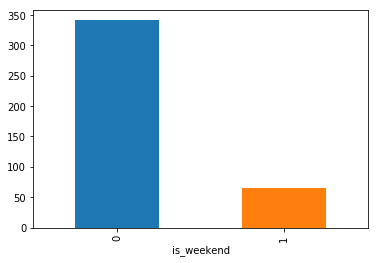

is_weekend and TREA


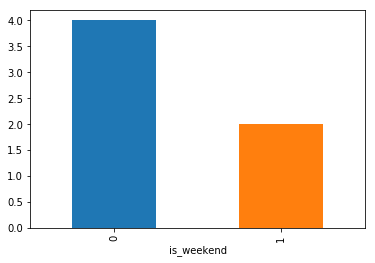

is_weekend and RECOVERED VEHICLE


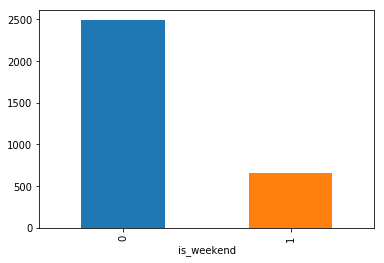

is_weekend and PORNOGRAPHY/OBSCENE MAT


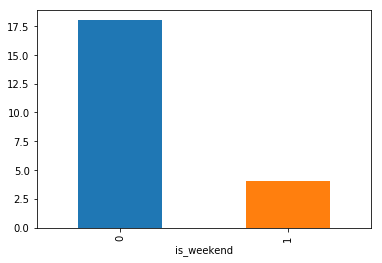

is_holiday and WARRANTS


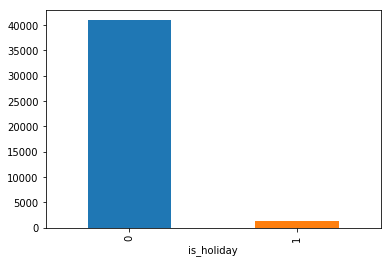

is_holiday and OTHER OFFENSES


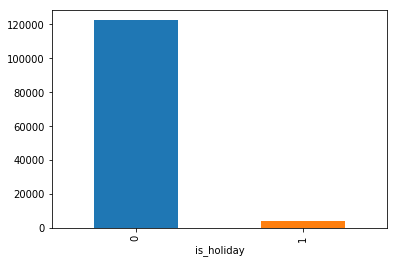

is_holiday and LARCENY/THEFT


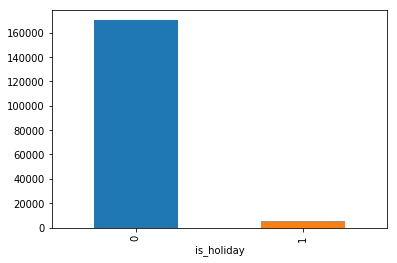

is_holiday and VEHICLE THEFT


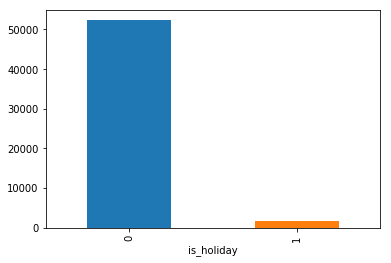

is_holiday and VANDALISM


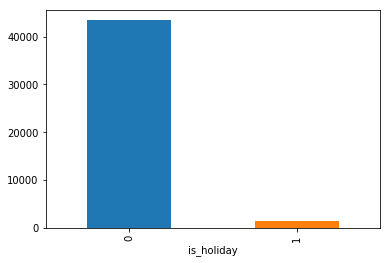

is_holiday and NON-CRIMINAL


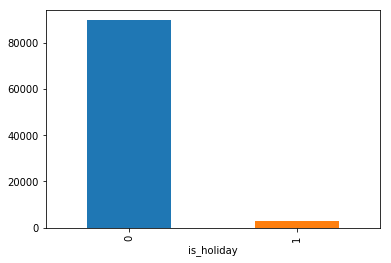

is_holiday and ROBBERY


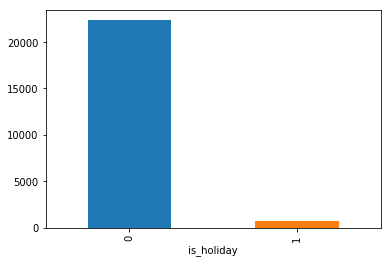

is_holiday and ASSAULT


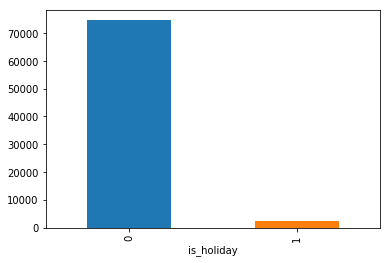

is_holiday and WEAPON LAWS


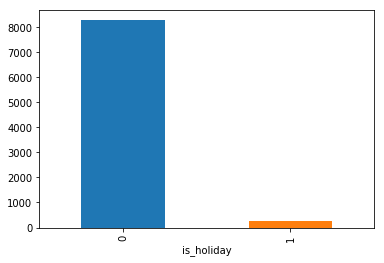

is_holiday and BURGLARY


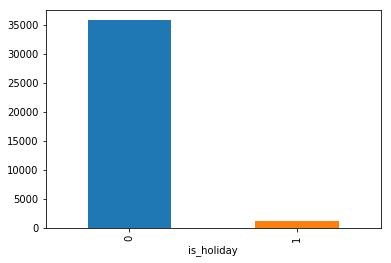

is_holiday and SUSPICIOUS OCC


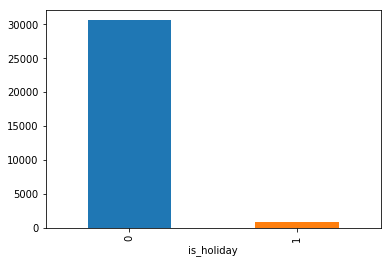

is_holiday and DRUNKENNESS


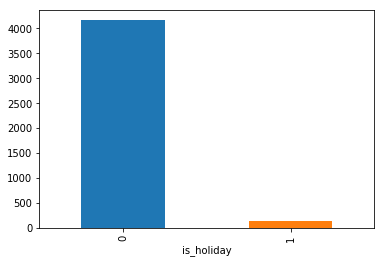

is_holiday and FORGERY/COUNTERFEITING


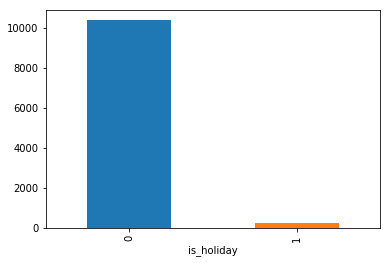

is_holiday and DRUG/NARCOTIC


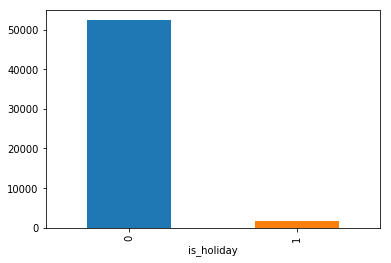

is_holiday and STOLEN PROPERTY


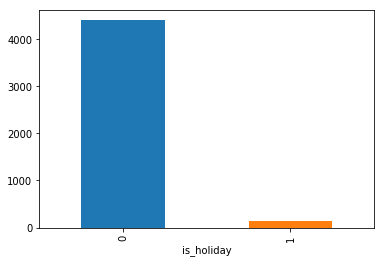

is_holiday and SECONDARY CODES


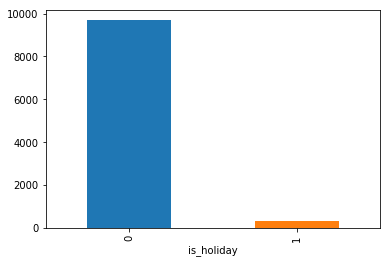

is_holiday and TRESPASS


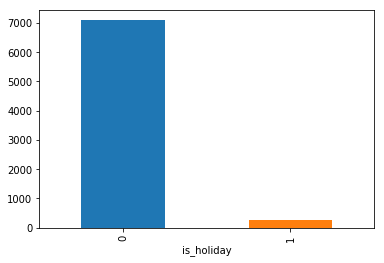

is_holiday and MISSING PERSON


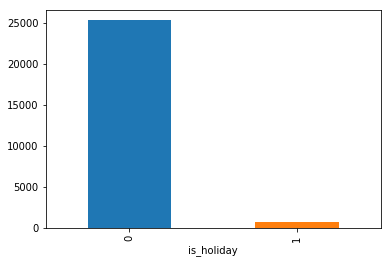

is_holiday and FRAUD


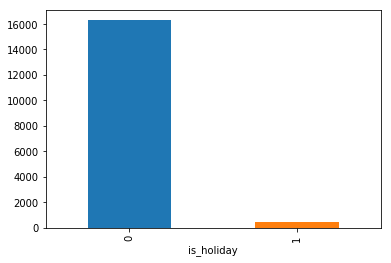

is_holiday and KIDNAPPING


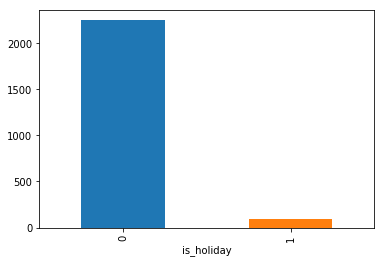

is_holiday and RUNAWAY


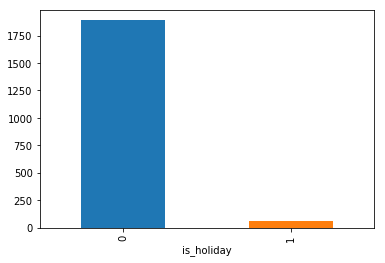

is_holiday and DRIVING UNDER THE INFLUENCE


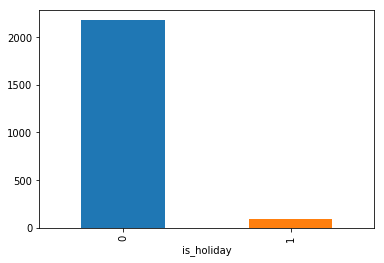

is_holiday and SEX OFFENSES FORCIBLE


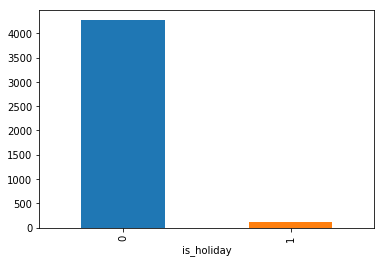

is_holiday and PROSTITUTION


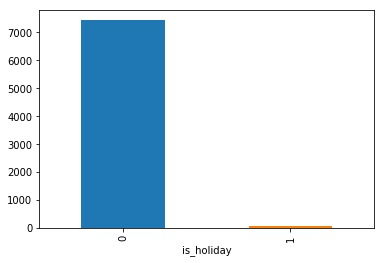

is_holiday and DISORDERLY CONDUCT


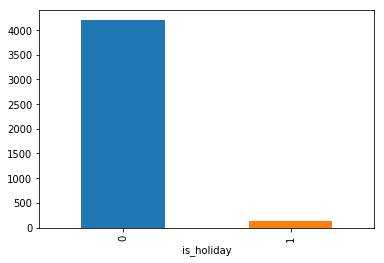

is_holiday and ARSON


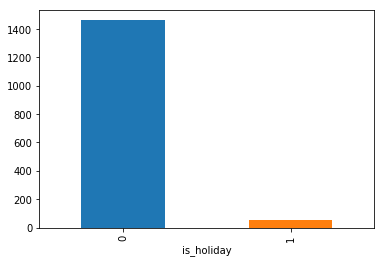

is_holiday and FAMILY OFFENSES


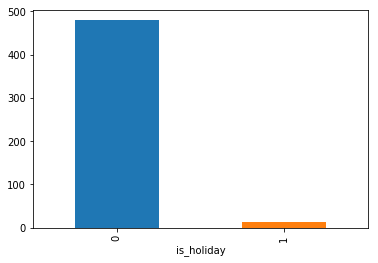

is_holiday and LIQUOR LAWS


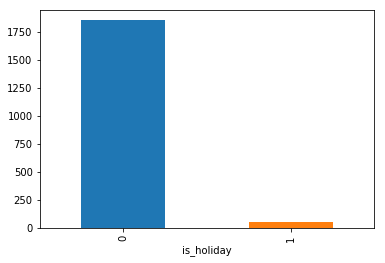

is_holiday and BRIBERY


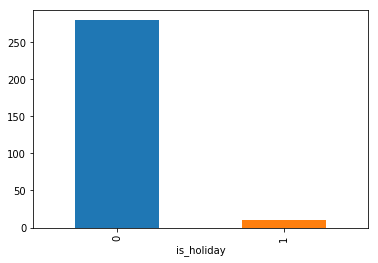

is_holiday and EMBEZZLEMENT


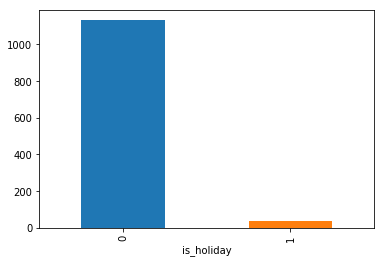

is_holiday and SUICIDE


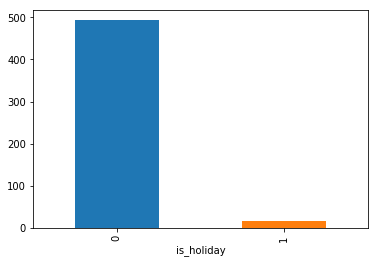

is_holiday and LOITERING


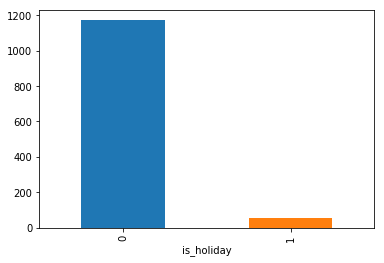

is_holiday and SEX OFFENSES NON FORCIBLE


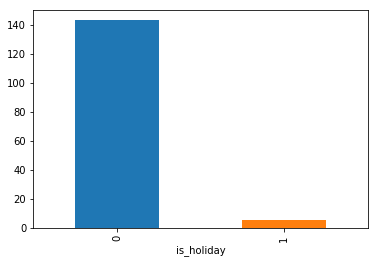

is_holiday and EXTORTION


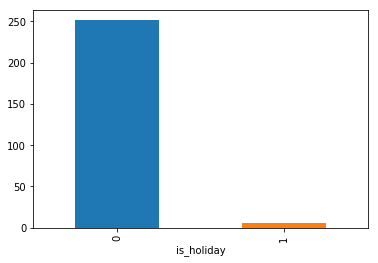

is_holiday and GAMBLING


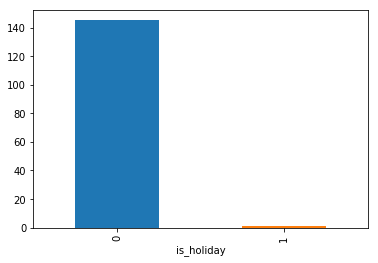

is_holiday and BAD CHECKS


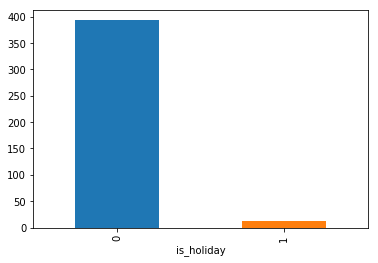

is_holiday and TREA


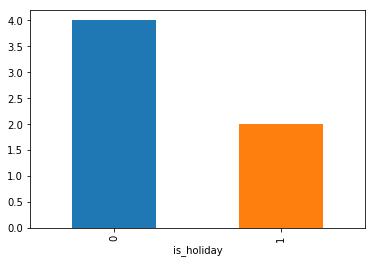

is_holiday and RECOVERED VEHICLE


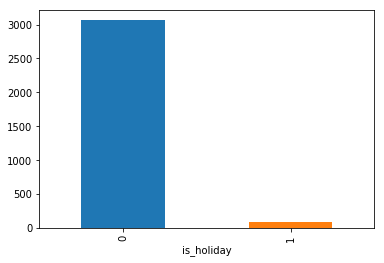

is_holiday and PORNOGRAPHY/OBSCENE MAT


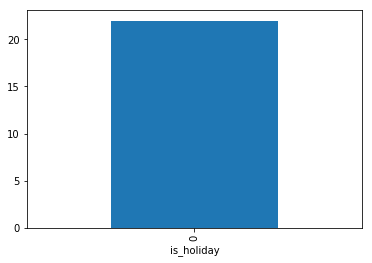

In [47]:
def t4(fts):
    cats = train_pd.Category.unique()
    crimes = train_pd[["Category"] + fts]
    for ft in fts:
        print("============")
        for cat in cats:
            print(ft, "and", cat)
            temp = crimes.query("Category == @cat").groupby([ft]).size()
            ax = temp.plot.bar()
            plt.show()
            
t4(fts3)

In [20]:
# test if is_latenight is correct

train_pd[["hour_of_day", "is_latenight"]].groupby(["hour_of_day", "is_latenight"]).size()

hour_of_day  is_latenight
0            1               44865
1            1               26173
2            1               22296
3            1               14014
4            1                9863
5            1                8637
6            1               13133
7            1               22048
8            0               32900
9            0               35555
10           0               37806
11           0               38373
12           0               51934
13           0               43145
14           0               44424
15           0               48058
16           0               50137
17           0               53553
18           0               55104
19           0               49475
20           1               44694
21           1               43661
22           1               45741
23           1               42460
dtype: int64

# Neighborhood and Category